<a href="https://colab.research.google.com/github/tomiock/DL2024-25/blob/main/Problems%207%20-%20Pretrained%20models%20and%20Finetuning/P7_PretrainedModelsFinetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/dkaratzas/DL2024-25/blob/main/Problems%207%20-%20Pretrained%20Models%20and%20finetuning/P7_PretrainedModelsFinetuning.ipynb)

# CNN Transfer Learning

In this notebook we will learn how to finetune a modern
CNN architecture from the [`torchvision models`](https://pytorch.org/docs/stable/torchvision/models.html), which has been pretrained on the [Imagenet dataset](http://www.image-net.org/). The [`torchvision models`](https://pytorch.org/docs/stable/torchvision/models.html) module implements lots of popular CNN models such as: AlexNet, VGG, ResNet, DenseNet, GoogLeNet, etc.


*Credit: This notebook has been adapted from the official [PyTorch finetuning tutorial](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html).*

The Imagenet dataset has 1000 classes and millions of images. Training a ResNet-50 model on ImageNet-1k with a single GPU takes several days. The key idea of transfer learning is to reuse the knowledge learned in one task to solve a different task. Transfer learning is specially useful when we do not have lots of training data for the new task nad/or when we want to speed up the training of the new model.

For the target task we will use the [hymenoptera_data dataset](https://download.pytorch.org/tutorial/hymenoptera_data.zip), which consists in only **two classes** ('ants' and 'bees') and only around **one hundred training examples** for each class.



<table>
    <tr>
        <td style="text-align:center">bee</td><td style="text-align:center">ant</td>
    </tr>
    <tr>
        <td><img src="data:image/jpg;base64, /9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQECAgMCAgICAgQDAwIDBQQFBQUEBAQFBgcGBQUHBgQEBgkGBwgICAgIBQYJCgkICgcICAj/2wBDAQEBAQICAgQCAgQIBQQFCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAj/wAARCABgAGADAREAAhEBAxEB/8QAHAAAAgMBAQEBAAAAAAAAAAAACAkGBwoLBAUC/8QANhAAAQMEAQMCBAQFBAMBAAAAAQIDBAUGBxEIABIhEzEJFCJBFTJRYRYjQnGBCjORoSRDUmL/xAAdAQACAwEBAQEBAAAAAAAAAAAGBwMEBQgCAAEJ/8QANhEAAQIFAgQEAwcFAQEAAAAAAQIDAAQFESESMQZBUWEHEyJxFDKBFSNCkaGx4QhSwdHw8TP/2gAMAwEAAhEDEQA/AMTFqYukS3ULW0vt3766VtY4tSgWBjM9SoI+hY0hUxhMiUhKQBvyPfpYVDitx1WlEW25O+RETvIwYrTrcVoa1+Y62P7da9EUtagVGLKqeYFys/zpiz9t79vv025E2RFb4fSY/EOJMbWiVEQ8XGyFBSUklP8Afr27Mt/IvnE/kkZgtcG31UMiVqk4muEMz5NRcRDgbaA9VSjr0zr7+d9A9V4bYlFGdl8AZOefWIplSlpCVRqIwx8Nrm5xrxvjii4o5IVCybKercKoPx48VpfyIU6lSmngsfW0QSk+3g/56TNX+xpuouVV5oKeCSNyLm1gd94MKQqfZaSwFDQT05dLw8DMXw3eMGbeT2B8+3ozWaBlm1W20y3aRILDNypACmkyQj/cDa+5SfvpRBJHW1w7WEFpUrMIulWbEXz2PI/xF2oyxKQps7fp/HSLg55ZbRx3xFc962tBrMUUaKmZLZkoVt1jYBU2QPqICt66weOZxyXUlmRuFKIH0ielSmpOpzPtBk8acpWBn/ivbtxxJdPqbT9LaktvJUlfavsB8j7/AHBB8EbHWHLcZIMsW3MLb3+m8a7lBUhWc3iQcOrYsLFOJ6NiTElATbVgUkOsU9lX+2ylTq3C02T5UE9/aD5OgNknpsSU2mcl/NaV6Vi4J6np7bQKD7twoIynEEs1QJ9Th1GjV+clUN4HQ39uq8tIrbZW1NKveL6nNSwtsbRyR4NNp9KbSlltIWPGyPboHfmnXj6jAY0wEi5iNXLXW2W1jv3obPWtSqfqINovMJ5QM9115Dylo37n/jppUenkZjTS0DiKudaCz6nhRPnouQu2IkVTudotjEl62vadX1dUVaoat9riU93af/0P06FeK6LNTbV5U5H/AGImaYQnDgxBicensESeRuPrtbRSWXY8sSklD/YPVHsoJ2B3dYc67PsU1Tb97C1/pGI5IpU7pTtG3i1+b+M7ZtKifx/IZVQVxG0h9xaVJUkAD6knpJy4l11EPkW/YwXFbjbGlW0NQxHkLFd8NWRX4kJD9Lkx0yYUxsBbQToa+oeNa/fpgSvE8iq2MiKv2a8RqScGPq83uTfFjC2PaTUMy3fYVKRKeTEgJqLyNyHT5CG06JUfvoA9AfiNU3ZuUW1KI8xyxsB069gOsE1Ep+hVzgQBll3lfLi6w9x8x69Npc/a5DMZoMRyVDfqewGyDvwPPXE8iOKJpbrcqCrkbC8Fs3MNN2JIt3iJWtf/ACfw/dNUaekJk0eO4C7QZckNhtxY7yqMSPKRvyN+/W5wn4h8Q0gJps67oCDhKsG3btGdMSUqpXmKA9XMRdd+Zm53XouBcWGsd0SdQmYv/ltPyVKW6nY7vT7P6wnet+Njz4Ow+ZLiSuVVCy0Ck6bpIyL22Pv1iu7KSbLYUFDVf2x/uOeLViY7Dr3foJ+xPg9OCR9SrQl306U3vA53fXFJUsFej+3TNo1OuBHqVetA/VWd8zIUe/ej+v79MaTY0Jjel3QFXiSW7a913RTq1Ubdta5K/Taaz8zUZEGC7Ibp7X/2+pCSG0/uogdV5yZYYWlLywkq2BIF/a+8ETStQ9MQSoPgjSTsf9dazDVt4x6g6LYj1Y8s3IF/3pSaDjKi1SuXgp31YzURP1oIP5yf6Ujx5PVyozEs0wTNkaDjPPt3gXUtWoFO8NXvCy+Q5tNnDOe7hu23r0mJQigtU6M64l9QAPYpQT2q9zskj9t9Ib4KVlqgmckGQtofMFWuPb+AY2F1DW0WphWkna0MC4b3R8V7j9jWDhuoZNiWVx2aeK36rUqe7Om0qEB3raYSn60lQGkg7CSr3146VvijxJwwXHHpVpz4o/gSQlJUcAm4262tBRw4JwpDStOgfiN7gfT/ADGhHiBT8Nc4L5xVeV4wqpkiba4eejuVOIDHaWlIR3Ooc9nfPsB9zvpZeHztQmZp6XqIsUjYbW5C/MQU1KYaS2ky6tQPOHl25IkWFe7FLpdOjw6A8R5CAlPjwAAP8dFVPqs1IVLydNmzFKYlm32NV/UIjuXrCxjVsp21Xrso1CqVWmtllHzP1KSn9vsP06h42oFOnZ9t55pKsG9/5ivIBaWym5xFhR6tNx9cNOti0KHBjWmWO0vsjf1K8aGvHgfr1LT3pmRnkSsszaXI+YcoldQh1oqWfV0jlz5otSdZUGO2/pz1fvryejfg2fTOOEjlCxn5ZTabGJ98NalRLZ5eYZy/lvEFwXZhtioyYsWoTaI7Io66qGz6KHHVJLKlJVvSVH82vv0ReLFaXJ8PPKklpLqNJUnUNWm+cb7Zt0jzQJTzpkNrwDDG/jkcPuNV22VK5t4GpNesvMVar9MptXtGlwEfhlYQ62pBkx47SO5qTtKVrIJSsA/SD5Ij/Tv4ymoaaZNm2Fm52TbNrnl0HfEEFapq5Zy6MjG0ER8DOfULT4P5ExPRrXstjIGQBWIqRWmi0JBcbXHbMpXaV+kjR+nRPg+NnpYeN/FE0/xv9nyzg8oBAJ3CRa5t36d405FxhtlLrl9ac2+uLQMPH7/TQ3xV7lyHb/LLPNHxY5Tg6aQbZZE1uotBHcJPe8E9rR+yNd3g76cHFv8AVJKSkyJSSb9QFyV8+w0n9f0ipKUhyYsoi4P0tFG8KsJYh4P5cv8ArWQshLrF2Ip9RYpjhaaRGlMIQ6qNLjJ8qcQsoTsEgoWCkjwCWDVeK01iVYmflTj07kFQ2V/1oxH5Yyzymyc+0ad+WmdeJvGPBcfN9x29QbicRCbcZW6A468soH5fckkn2Gt9B664XVplKUjW4s2Gbf8AlovIYbaHmv2AEZ76V/qCsPzJcin3dw6k3BTG1FpiXEup6AmayVKJTJYQhX06KRpGjoe46Gp3+mqozE2Z+dmUOBWS3ZSbdgsHI63GY0U8cy7bGhtshfW4II7giCbwh8e/FtDm0K3rHxzZ+GrTeqKFTaZQKeppLEcnSlKdWpTr7g33Ek+fOgOsOf4A4nkXSpttCWANkc+lzk/mYs0ziSmO2Sq4Wev8QdXKf479m4aomMsg4wvTBucLJmRFRqnSotWdbuSk1BHcorciKQAmIpAbAcUd95Ke32PXmU4TrNWIQlJbWP7k+kj369hyzBRPPS8kyXnNj0Iz7Rmm5XfHX5gcksjmv2PNmY7SFFijwqY6448wT4Hb2janDsew/sOnHw9/TzKJImKu8p1fP8KQOg7QvJrjh9XolkhA5cz+ca7/AIWXxhuGt8cZsJYpuTOKa5nxmkNt1Wk1FLrlWmVAJJeISQSs77jsHQA2dAdAPETk/Q0Oidl1JYQTZQHptf02Vttb6wVyaWZwpW24CogXGL39ozSckcCV6s5Hte0rgoFdoKHJkVD7XaEOhh1xKVFG9jeide/S+4SrqpBpxxdgoA4PaAubT8Q4EpOLw7vE924w4iceqtxVq0+6blwrHuiRbzP4jSVy5CpL8shtDXyyFFakuKSj1+0eSk7+odKjxCfrNVqbrEgnzHSnWtKSLelI1EXNhjlfPLpBfTGJWWltcwbC9gb79L94huGciQLBu0X/AHJddtTrFtatyC7AnRO75eK00SqfKkLIajoaQVDWioqUdlPaNr+ku/BS6fhUqM26QEoAuTnItuST22/SamyLjyluPizSed7CBos7lHjDOnJLKmX+OL1Jl4/auJiETE3CaTMUjvSGipGh63a4pJ1pZQrW9Hol414Or1Kk236s0pp1Y1f3WBOxscEW+kVW3pdcyX2yFJFk/Uf46RbvKSf8UfIONJWaLiujFOLeNlPW9HvJ+zZMiRc34AhpSlFL0hAbSlfb6KvS/mJ7+78vkFPhfw1wpNvGZcD0xOkAI83SloK7hJJNtxqNjzEXqlVphtFmbIQNzuf9fvaM6d88wsc59mV24p+OpOP7fhMs25YkWjvBp+EklAXMqD5QsElDiQlISdua2Pp312FSvDeZpWmW80LUr1u32NrkJQLi5uDcm2PeBb4/4oKeti9h163P/ZiL0O465f1h3Lj7POTr2qttVCW5Jp1IfSJBpjqlFaXXFjSUuAaUWm/pAH335hqxElNonKIwkKQMqvbVixAGcHqc84YEnweJ6XDc6vSo7WG389uUBDljCt0YYr0Km3AI86kz44m0ipx9mPU429d6D7hQPhSD5SfB+xLX4V4zlq1Ll6XuFIOlaTulXQ9uhGCISfGHDM3SJoy0z7g8lDkR/qPBh/F1/ZyyjZeJcWUVyu37W5yIcBhKuxIV5KnHF+yGkJClqWfCUpJ6t8U8RSNGpj1Uqa9LDYJUd/YAcyTgDrGJTpB2YeS0yLqURa3f/vpDO4HA+DJ5YJ4uXNWL2z/R6Ky1/EdRxuw22uA+uKHVIdemEMsNsrKkOOuKSBr3SdpHPtL8VpudoArlHaQw68T5SXzYFIVYkacnUMpxbuRYw6Jqg6mxKzSyryzZRQL2J636bGNJnwqPhUcTuMd/3Byls29KJnO4oiZLFCXMuWl1RdrtqZSh5v0IKltql95UkvKIU2g9gAJKzizvirxHO08M1qXQw4DcpSSdQ3SrqBflscHtFaS4VlWnStlesdbbHmD3hxNM45cNZ2Qn+V1icc7Dk8hE0KpQZ9Yo1OZizKoVhKlR3fKGC+v0UNh90d4Srt7wgqBpOcbfG0osOEqaGSFG4BA77WvyxztF5FEQ1MAmySdj/wCQvnk3hN/lXdsK4v4ZrGNLrqrCGoX4k0YaV7P0ltWvdOtnQ+wPSI4arUwsuCt3bWCLXxcHG0ZFQlWysKlMgwPND4ic0KLAbwZR0G3bbShFJqFat1xyq1F6IlWyg6BWwHFBtxTuyo9gGwCR1XpLzip6ZFKQXX3znYISkG9sfML2JAtsOQjWakWmmUuTRwDgWx/J/SPp3ZwUtfC2NnrvfrtSqts25ITOuW3buozbiUvsyUJbeXFUpaXUgrbc9J5CgD2qP6Ci3UZ2n1AvMrKKi3cD0AAjmE3uQbddxz5R7rFLU7LJUMsnJzjtjEGZQLSta5bLoF31yp42vuya++xBqNsS6XDaZqK0glrv9FCdqR9RSdbR/TrqrP8AifXi4mZfmivNlJKQRboU2tYxBKUZgIKfLx23iY1zjZi7DuP8lm8uQdz0DDtQo8uXHsu4rji/h1LilH1hL7+nnUJ0oBTrhCQTvx10TQOEuFKrIqrki35LyQSEJJvrA2SnY3OEgDeMV6cn2FiWX6kqO5GLHkT2jNHlb4VtvUiDamReLeS7Jynjqqon3jUPlJkWXHtx6G6w48w6uM4exJZWAnu8Ba+0DawemIKpUfsuXmn0qWpbHqB9K0WBwoHNxcHYE7Ra4eSwzMOIcXazidNsg55ciMW+sLKuOm2yc9Xaq751YauMJjgwIBLjzkxKdF5ccpProcSAfoKVBR7UpOwk3KIVu8PoZaAAGqylYGkn5b4KSnvfAv3hwtTrTdXMwsk30+lJzcCwOxBvgdR9YsLklbcvLWIafAah0in1WjSXKhBK5oUtbHZ2aZR7qCwhS1AhJBGwD5BEvDRkUKrr81epLwAwPSTe++1xsOu14/fGWUNak0Oy7GkNZJtke459+m9oXFx/yPlHA3ITHF54wTHYyNCqzUOLFkgmPP8AmD6C4r3aQVMvJdKCUneldyTsDrpLimgU+tUh2Un0hbChci1/l9QNjzBGx9o5QkH5mQmQpGFp/wBcuxEbtcXfCaw3i7AOZbLpLeQLdtjJEymVe9bfiTG5qPSbUh16kioPJ+ZcgKd7/wAxDitjuUr7oitUYPvy9YnFLU9LJ0tlJCUgG2SkfiwADgDBAxDDptScZZXKMgBK73vki4sbH2653zBg2XxkxZgTH8mh4FsSPhqmMxlCNDokpbafRL3rONlJ7kqUsl3ayO8950pO9gQ4yX54XMzH/wBldVFR2A0k+3+I1aC15VkJ+Ufl7wUdhz7exhbEORXKRW6nErEUynmoKUlUF5QCkJcQog+W1BXjewD4J6Vb1DLA+DfQVB0bXsAeivpvBcJpKh5qTbT+Z9oF+qV3IOZrmxDZDrpui2qW27V5C2VFmUA06GkoJGiDruJA9+39+kPXKfPLeZM4rzikkqTc2tfkd4+UltJSlpOi+x6wxu85T9m2rZ1WxbaDNcqshJafZZ/nS0pSkKSsp91DfgknxsddJV1c4xKyj/D8olWNJCfmSLYPcf3c4qUllhSnW5xy1si+xzkdvaKNy7iTGeUrJuW1czmn2xflaYbrtNbCHgpFSSpRS8txI9NW1fyyhe06142B1LMzshJBT1TSlubcSSLg5PdWbXOMGK7skqZAaaJU0D2wMWsP1gS+P1StS2ZVdsJVoW7VqdIWhgwCwAkOt608knZC972rYO9+3WLwuzLzVUVQGSHFLN1ax1GrYDAF7Dp1iCZV5Ut8YsWANgAeht9b9ecSDlLxywRek608h5a4y41yBVH2RQmJtVpCKiuNFUSUxx3dw7CSo+R5J9+m3xDKucNybbcgi6CsDUi4seRIHMWtc+3OMqmzyp0q1Ktg4Ntuf6QqfkdiL4cdYlW1jW66viPjNl6NDkQJ9PsyqqtWozKcXkrAkCAppLjClNtuKD4UCUJV7oGoeDeMKy5R0vThUp5tSmnCpvWHNJ9KiCCL2O4teJ6lTUh/7sXbICk5tpvvY4O8Kkuvh7iqVx+z9yht6zruse2Is7+HrAZpkmRKk1K34rzgm1WQ8orWt2c8FLbeUVD0mWSkkLBBdUa5NAMsagpZUlRuBpClYSk2sAEJ3GPUSDBBwlobqWiYulNlJNidViL3F7kk4t2taBIta5bmrNlUSt0W1LJsJmIltqdMuNwRTrZK+2GNuLQsdjgCik7WT+p6EJ2mSrM44h55b6iSUoaGr2Gs+kWNxi+3sI6Seq7zskG22UstkZU56DfrpF1Z3yRvm8HZgrhMznjImMOYmKrdxpV6Vj64YlRrlNtxp1iDUkRn23wmnR3AtTmkOq7m+5RbXHVskOJ63eH6/U5SVekngshViA5lzJsciwNrcvwntHK/GtGk1zaW2tPp2Un5TzA9j72BHeGs/Et5tchMOZy4z2TgW1bsquLPRj3/AHTVGWO6DclNlKUw1Hbd8pW202HXVaOw4W9/l6hqzst5Tgfe0G33Yucne9hy/CL878xElBpoU2pak3N89oOi8+Tdo25a+O6/Ll+tYVd9SO65He7XkLCe4BJKVdoI2Ce0/fWvfrldHFc3OVANSwDgT6ikkjAOcwWLk5dqXUp06b4BtffaCeol4ryHZrNwU1yJEiSktKTodyW0AAJQknydAAdPatLen5L7hYSTvAfKIDa/UI8WEr/4wWZnTKWHLmfqtJynbcgrZ+ZjuH8TjOsocS4w6jSF9yFo2zvaDrYHSvqT1Fk3VrmgQkElJ31flkHoCLEbEwQNMvuJSAQTbI6fnFPU3kzdeILyk3tJohaxT85IjSmJD/YqmLUkFDaUL0olXchWkg/r7dI2h+NU/LTzswyNaCqwbyCR1GLCwyb2jXnOHkKKUBNwRckciOsDxyZ+IeMg2tbeVbftWsWZRabGdgLkTEKU1IbU/tzTrYKUKAG092vcnxrrd4zrs/xHWZZSG7eRfF7gqJCgkjobZ/KKTVN8tlaZZQJVv25fmIAbGXM8UyQ9kC3mptVoVPUoz5QYUtLKSra/UWkdo0nzskdNfgeSfp1QmJ+ZOmbmFE+wPIc8n9oxanSVNy7cuvKEwzS8/iC2ZlXEVXtXHMa5q81WmTCMksKiPpjKR5DBSrvQrX/tBGv6fPkTcUeN0xK6qW0kqWfmV/gc7nmeXKJpLh5AUJi2RsN8/taACuzGvA/krUqZUK/h6wHMuW3TmW7lfW04EuJjElhqQjuCXwfzErBJ9iSCR1Ro/HtTl5ZptJUwldzg2BJwbc7kcxY/XMEoQlwqSohWwNxfbP6dNoGesfFr4J2xGvLFdxXFXoEeHGkUmbS2aG4IjiEAtmMyWh2aI8J7dAftrp0Unw24ofYS803qbcsQdQzfmQT9YCJrienocyr1pO9juDyMZqaFJozWUmFU2JT5mP7g75dMn3VU1FLsdbigjuYc2S42B6ZACvI2D9SeugJtt0U8+YSl5mwUlpAuCAL+ocjvc29t4klauHppKj6kuZCnF3z7HmNrZjWJ8Ka6Lyn4aqkO2rnpFzmm3R+HFdKhqiRoSlMNvLbSvu0vt/lnuAT2k9uj46594rZnWptC5VtYCrGylDUR1P8AaOvM7xeqUxLOq+8Ukm1jYWGOUNDzRcVmW3QG5CrOpamlNzGJEV19IbjKfKVvKjII02ha0qdKPbvWsjQIATfiRxu0NKg3ZWUlPP6f9zi9RJJ0JVm6Tn3tEc4k2JgzO3G+qYXv+2KbVwRJajyXkgSKV3POKjuMvD6m3GtpKVJIJHg7BIO34XSMrOShQkJS8sZVbbsef0jFrLiwQ4q6kA4EEVjPjtVMd4+t3GMXJS7/AKxr0lyEMJgteoB4+nuWU7/v1qVbgyfbeRL058OoV8w2t+UfSVYZUhSn0lFtud4gtpcJeNnGqzLDsvHTNGnX3Wq1DkzLrvaZLrNVqkBwFbyjJUoKCiS32tgtoAA9tAmr4nS1LqBblH3Qy44UgK02FrAYAsB/k7mJuG2JlhKnUpKgAb+/c84IfO3De1aHaNs0CBU502jvzkVOLPciNlCprTiHS2spHY2XUoUgkDygr+/ulONv6fnKTNtvUxaltrChqIsEki2bHvqF+YG9oIZDikzAPmpGra1+Rx+mIE648N4uyjaGS0W/lS1Lutqt0dNPlUWn1NJajSEIcSrtSgkKC3FBa+7yFNo1rR3Re4QlqdMNzkq/oQzmxKgonmTe4OR0FrntFxLjplwyUdbEbZ22hXVOVRuEWJrox87SKTV3XnJdTSwgoVFlyHW+1SXW1pVvylIAKSCn6fv1bnqKjiWotVNM7ZxsJSU9gd0nke+/eK0lNKbSG3k37wvTDvKqh49ep1v1pit2Zc7OywzKjKabkJJ89iSACPOtD26aHEHhvNKbcmmAF6s6hYke8Xp4ttLHwygpIi1GLf5C3tb993Lg/G9Yq711K+UFSSAhhO1aLqjsEpSCVHQJOjrqnw9wkqZfZM5cttcgN7ZsDtc7dBzgTqdSW0FmX+Zf6dz+8Zn+WWCKxx0zzemKrgu+m3vcEJbb86fFjLZbW86n1FJCXPq8d3uev6LeG3Ff2xSG5wS5YTlIQSCQE+kG4xm0JniCmfCzSmfMC7WNxfnmLIsHK9wZgtqyMD5Btu07wXBTHpNs3FP9VFQt+KhRUhhK2yEvoSSUt+tsISpSfqT2hIpxRQm6VMPcQSTq0EglxsWKHDa17HKTzOm1yL73uacLTT08yimOoSUg4Vayh2uDkRrV+EHCp2LMCXDYaLWlU2FTrllfOPqfLi6zPd7HFzthKW22wFNspQjegz5JO+ua+MuL3Zx34wOCziU2FiNITgDJNyNyTbeDBmlIaWpi19B36k5hgTuF77zddt4VatTIQsNiURFcV2lySAkaKkp/K2n2H3OvP7pr7CnXluzRUCL+k2BP/gjZM0gAM2sOcXPxZotcsu8Lrsz+HVu2H9C26k0Alt59WwvYGiPyp0r28/t0R+GdafokqtqfQVlxRIAGcwP8Q0xD7gVLGwHP/UHnbmPo9EuKNUGKtJnhzTqV9qdRvPt+514305abQ0NzBnWlK9Vieie3/sDj04SkNKA5/WFZ8Tuc3G74kcd25Ztj3pb9MtmHTpU964UCK3PcX3qfDbiVlLjLSm0JKu4BRUDoAeRjinhSTS+hirBPmo9XpVc45nn7DeCCk1p/SXpO4ScZFhnpFo85/iKRcMXrg3F1qUqucgJapQrcsWq5GciQYfa4236vY4vb5WNhtXs2e7YJAI5Wn599wpXNILKQClOxUb7EAE7c+8XafLAODS0rJyeQ+pxmEZWpxZ4/Y5vzNWdrOm5NsSRWa5LqVJoP4kW/kVSXC4Y/pNKCO1K1rA3sga2d9BPHnGlbq6WqWWUlKQACUgmwxlRF9vpFr7KYlUrdDts8jb9IJS37Cxw8abVr9nSKlcDMlmQ6iW8XChrW9aP7/wDY6XfDsqpmfS2lOkJOcYNukWky2hhS9Vyocz1gi7LwFx3zfl6zb4qNGotRh0d4kx5TafLvskDY0pJBHn3+3XQEnxS688uSfaLaLApVyUOh7gwON0pTKEvpcuTunoYY7KtAU24KdbllWXBtizG3U6LQDTSVq/QDXv1lVNue+KShlBS1fJ2H/GNJkNFJKsqjHJ/qKuM2AsX8k7PqmIHLkqOa69Acql5U5l1UliOwhIS0+UefTJ0RoeCEk/bfXUng5xG6htyTdIDDdgCSB61Z0g88ZPT6wEcScOl1xL6ASpW47DH0hZOJs08bcFWTiyu2XxqpWZ85NNmTctdyBJkLpdMkeuShql0yO8hLnY2lJMh5XkqI7PG+t6pUqsT83MtzsyESpw2hCQSU2tdxRHM/hF7dYmSluVYbMui6+ZJIF+wEaJcEfEehUesW7bWU4dsUjHN0xm2radtuhNRI8aoL2ox3Q35AcB7go/1JIJ89c01jhV1TSyhN/KvqTgWG1xzwd4MWHwVA3yq1veH3YWq8Gy7YmV0TIlRpzsZyW8iTKS20ygpJCiSd9h7dbH69L6nVIySigDUk9SMd40H2PNN9jF7YkVUrqo0OrPri0VEqF8y20ygLJB8hP9gP89MLg6mtVFaniv1IGw9oH6xOFkJb04Jic4+Tc79ceZqkeVDo6XCgLWrQI39h1r0h+cZU4icH3ZwIzZtlp3SWj6o5eGI+fHJ2iWPa3HuTmq8YeDmVJhfgjCm22/llL2porSkLUgknaSojrozi7wfobzztWRLAzJubknfra9r/AEgFk+J5xpkSoX930sP3teNXGEuTfH/HeHrXRNfoFPBaR6pQlKFOqUBsrUkbP/PXKsnJNS763A0PMO+CTiC9+bfcl0tazo6coh3JTlhx1tK3m7ymvPpp8aOuZHj05rvMuZr+UhY+yCSCT+3VFcpPVWZRKyKQVE2N8ADnG1JMNsILkwcAe8Kexly/urKlz9kic/HqNTmISpSjoJClAD/AGtDon4i8PU01PmnOnMeEVxLw0CNXWHsXTMC4qsC5a44i+KrKU292R060lRCgdfqN+/SY4rnJpp+XmUm7QudI5n+IIaVJN6FIV83UxcfPzJs6jcdaAuDOetp+t1aAlUxh7036ekLBKgR5B+3+etLiqsvzcu2zb5yD3xEbMmEXUncQgPl3xfdxrnC1uUlz1S4r5x5dNKFFr9Sn90kQlq0GVqWQQhAPj7Dz0VTcvNfYKadLrusKC0kb3HzDuecadDrTLcwVvDFrQmen8Df4lyXmDHVPuSZSJ7NO/HrQQhAcRVo5e/mIWfcKbSdePPkHpxz3jA5JSklNOthQWrQ6f7TbBHYnOekCL1MVMrmGWFWUhOpI65zGk3ht8PjAUjD9k09wJvL8N9GUTLUVFh78yTvexpWyNaI9uqdfmW51Di2ndK17kAG1+gOLGB+QDyFJStOoJPO/7xSvNCyLUh3CJtIrdYpuQ6GYVGgtIecahTGUL0hptgrKSjbiiT5Pdskk9JL7NTLsKlnHPONzclIBtbGRzHWDd18uOeagaNha5IJhjXHTlrecW2IeNrbo8KTd0LsiVCqLWVBoJ0FIbSfv4A37dBfCdaqdMW6JcZcO/YY/WNyoU+VmEpLpvpGw6w76zqvQLqthuqvPuM1f0/ScipH1h3t9tf8Ae/06eb/EK6lL3T8w3HQwFN01MsrO3WOM9AQ8p5Cml+moEEE+PPXe7xGnIhLwaOLKtd99O0216pXnDBjqSUtlZ7VaP3346TPFsrKSKVTLSPUq8blMfcWQ2o4hhlXtik1K32aXcFQTIaQ0AphxYKd6/v1zXJ1p5qaLrCbG+/OGtqSWw2o8ooTFdqzJebbMsOyXIKavPqLMeH6zyW2kL79grWfASBsn+3TE4ingqkOTk3fSkG/M9P3gXNNeVMJQxkk4jerw8yBamRcXqprMyPckq3FJpin9gokSWvpcKD7FIUCPH6dI6QcbU2UrTcpAt353gvVfZJ7flFJfGyw/fL3Bu98v4tEOpVWhxkVSoRUu6S3HbIUtTf27kjZ/fWuiul8OSb07LPP/ACKUASORVgfra8eBUHG0LAHKKI4s8/eGWdfhd3kzmfI9kUhyNakin1Sn1KShMlqQGCPpbV9RUT7Ee5PjqhUKRUKZNLo7jai4F/d2BN8+kj/sc48qVLvoMyhY0WznbEAN8LvibXci4pxTmzJlcmVSpwnnHbflxSfWMJW0Jbe0dqBbKQd++h9x0c8WU+WcW80GrNEi43sob499oEqPMPJS24VesbEf2nkevtDm4nHCo4MmXRc+P7wj0i33W/m51DeI7UlZ7itIP5fcnx/x0ta7JIblC80uxTuL5tBXIFZe0qF0mBcsO3LErd71G7L6pUXIVeqVZDMFGwoU4JJ7VlP6D9f36zKHWpdLBaUNSlYv0jSqNOd8242EHvQrUsuj3G1IRS6HTXlqIS4ygBSyPuerLs5L2sspHS0eGmHAraLk49Scg1bPd41AToUmxoYZjR206AWSnZ3+qgDrf7jqjwC3NGpvTJUPLsAB1iSveX5SW+cf/9k="></td>
        <td><img src="data:image/jpg;base64, /9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQECAgMCAgICAgQDAwIDBQQFBQUEBAQFBgcGBQUHBgQEBgkGBwgICAgIBQYJCgkICgcICAj/2wBDAQEBAQICAgQCAgQIBQQFCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAj/wAARCABgAGADAREAAhEBAxEB/8QAHgAAAgICAwEBAAAAAAAAAAAABggFBwQJAQMKAgD/xAA5EAABAwMDAgQEAwYGAwAAAAABAgMEBQYRAAcSITEIE0FhFCJRcRUygQkXJJGxwRYjQlJyoRgz4f/EAB0BAAIDAQEBAQEAAAAAAAAAAAQFAwYHAggAAQn/xAA2EQABAwMDAgMHAwMEAwAAAAABAAIDBBEhBRIxBkETUWEHIjJxgZHwQqGxCCNSFBXB0RYlYv/aAAwDAQACEQMRAD8A9BFuXC2pSUh1P3z/AG1/JLp3UG4BTF5yrWj15haEnmM/QHWr6fMx4whJ32XL1WSoKHmZ/XThj8XSx7lCSZYUknPXP89DyNBQzuUNzJSSFHl1OlFQwDKheEMuyeLwXzzg9idK3XFihgLFTaZCHigpXlJ+vprqZ27IR8TfNZK/yYOSc9/bUD/dRwQ5Uo4PMA8h/XSaoz7xUuxAtXgtuRHBgYxnSuoYA0ldjASh3pbLT8mY4W8hROcDtqiTZvdL523S4v2czHnOOrQAlSjkY1UGUm2UuBSp0fdPPS7zcTgtP8sfTVk0+pcHWCuVuQrDgbjiOjDzhKx1PXvrQ9O1/YPf5S+Y2wAptrdKGDlTxCvc9tWuLqcHulUsoPdZ/wC8iC6BxdSr9e+mLdcDviQ8ko4CiZF9xVKIEhCSe/XXMmqNKH8fssRy74ahkPpJPv30PJWMPJXzpc2C6WL2THOS7yaPpntpTJWBmRwiY5r8owhXvDlt4+IbGO4PfUj9UY4XTRjrhYFQvGIgjD7fQd9KajUYhzwiBJhV7U7ybfSpLLvLunPbVX1LVg7hc5vhV3U3RKQpPRWT6emqxU1lxYKGVp7qqK7SY6QpRKlH2Ok05PKEdGCUI0m8UNM8kr+b6/TTyihDcqyvBAwpJ++WQAku4P308hzyk87iTZDc2+/LUrypagR9DnUvh5xe6SS3uoVe6c2KSRK5gdvm66KiMzM3v90M4WUS9vW42vLz6kpH10Wyuf3Qz8G9l2Q97FziAy+sAeue320WNQ/SFzDE95uERNbrkJ4h1xSu566imqCW3TaKjcBdTVP3XcQvJeUhJ75Oq1U1JYbhNY4njJ4XNW3aabSpXnnj6/NpVWaqA27iui25uEOQt24r8ryhLGc9QFf01S6zqFgdbcFyWkK5aJdTE1CAXEk4zn01LT6gJCM3XzZL8r6rUhgNqcbWCcemjahzQ291y5w7LWrC3SS211kgD79NWuKnyrHIMXXRL3Zb6fxOFH300j28JJUjKiV7nF7Kg8CO3U6KjZu4Sp8Ryo5d+Ovr8tLi1Ensn10SxgB95CeGSpKEzPrzgSvmlokfbU0sjQNvCNp9KMhu5W5RrQSxFCk8uZ6dM6UzV7APdVkpNJaBlYlVhz4Y/hkOEj1OcjSqSrkcRuwE4bQsAtZBEit16IopeCk+gOO+u3U5flCzU4afRBN23nUG2k+ZIWAQSQD3Gqbq9G5zwzsq9Wu2g2QZQ71lPSm3G31Die/11X6/QmBhDgq82tN8JtbL3FfajIR56lD3PfWfmSoonkR5b5Jux4LbqwJe5ThZUnzOn/LOuv8AySqdgNC4c4ALU4JdSBKfNWkf9DXoNsjQMFWhzxwVhlVbecIb8456DodFxlv6UvlBc6wR7bFr1eYoOTluoR3440VEDzewX5HQbjlXhRbVYZLaS2tZOOpGpJq4N+Eo2HTAOyva07dcdkxY7DKlPOLQ2hIH5lE4A/mdKmTySvs3vj7pkyna3KWPfLxPVO59tN6LW8HNOrO6m8FuFqK78FHz5xD4ZmfhwGTIcYUpIOQnllRRy4nPpHpb2HupXx6hrsjYqcDcb/tc8Wv3XElaNpEeSkb8Nfi8v6DV6lt9vbG3ftauTnRHeTVaHIck0+QsK/jHELb5paSSB5iOWFKSkpwcj0s/Qen6qn2Rsikj9C0/wbhLo6l17F30TSWtuBeVfptUn1qoU2tV63B8DcSqRLVKT5ZHJqcuKkZ8ooUjzCyVqbUTkKwceVutejoKXUTT0pDA74QfhJ8g7i/z5OEVKTa5KwqlVZNdpzdRDkZ2OsApcjuh1p5JAKVtrTkKQoHII76xbqLTTA8CRu1wJBB5BHmqxqLtwKwbfju8+OSgZ7apmoyCyqgaTgK/7aU6hKElSx9tZxqoBym0HKN3EPFHmFSiMZAzpAxzb2CLMVxcoMRss8495rjRCcjPTA1vEGn2HvOVvdFuKLoG2sWGgBcQKUOx46ZxytZ7rcogQNAyjM2nRbbt6r3NWipimQ2uYQkfPJcJAS22PVRJAA1ZdB0h9fLtGGjn5eaJBaBdUhfW5tw+H+XbV17z2/CGy1XdRFeq9LhL82z5KyPLRP6nzWF5CfOGOKhjHUA2vTuk6LW3yUun+5O3LA44lA5t/i7uBkEKE1F8cJm9z7rhbfbQTr2tWt0B+5awwmn2aoyUeXUanIQRGW2T0U2jPnLV1SlCCVdOmh+gfZ7VV2rtpy23hOBfcZG05+vb5oZ1TYXJWmH9mbYEyJv9Or9r1W6KDe8VuoR6jDlSPKpVMrLDjvxkyU1081txtSUobzxbfUlfbAHsD2nVf/qJIKgEnFrfqFxjg8AKJm6NwdFh37D1P5ytzlR8cW018M1ilbV2xVPEDc1vwnJNeqcJDTNvWwllHJap9cfSWG1DgT5bIdXkABPrrzA7oKZhbVVJFOHH3W/rN+LN+L6usERLVtcc5P534COnLIsp6DTNyaNakS3rgq1LZkKJZS1IZbeAkeU4U46hayfvk+uqpPSCnfJExxcwOJzm/ryRnvZB1FQPiv2STV3Z2RbkuruWS1TYFKlSVzXaNISUxEvrOVuRloBVG55JU2ErbKjzCUnPIXqTXmVkDYdTBdsFmvbbeB2DgcPA7XLXWxe1lXp5w7kIaobdMaq1Nodfp060LimEpiRZ4QETlp7ojSEEtPrx83AKDmDnh0IGM6vo8/gvqaF4niZlxaCHMHm+N3vNH/1Yt9UCKI23tyPzsr0pltraKOLZA7j11lM1Y6U7Wi5UkVP5rurH8M0UAYx3I9ND0sZ3+9yiajAsnIqdusMIWox+Axj8uvQIqL2wr/I3agVFLDr6EhvCM4xjt76PiAugfeJSo7reJjZ22K5ATXoG6d50ajqW/GhW9acuciVLT2KnEpCMjOQCf7a2XROnqp9M6mjljj38lzw3HkPn3X5LKwCzr/YoD3Y8bvh43C29umyZdl+I+NSZbC2qiuZt5MRE+A8rm84844kIS2kFYOfVHT0Om1F7MaiKVj6WqhdICNobK3de+LZvfyQf+oYL7SfstNto7K+NPdmn7dTtjrR3nu3w5wroqCtu5Tj7qXW4ClHyVLfUnLLRDZeQrACjzbUodMepqLrDQNPrp46uZkdTtb4vFi4DNj3cOCPkVA9znjK9C/hp/Z67d7MUu4KtuvVKNuzflWTCMidIgrb4huN5bvxLZfW3LfdUr/NXxDSy0lSUgqUdeYeuPbXNqUsctOPC2Ajm4NzyByMW+X0Xcc4ZzwefUeqsncbaCDH2wtbYG0KTb9p7cS7niSKxTKawmO1KpbbofW2y02AA0tTbaVZ68cpOe+smHXkzqtlZId97gkm7g62PoBfPnZHVNI1sZ8K9lf7dEqN7S3Y9MYSrj1ypQQhtPYDr07emleodUUMA31EgaPU/mEljoZqg2jBKhK1sdVgy8+y7S6itI+Zth7kofp66zGT2l6NWzGCmqGud/P8A2upumqlova6qCt7WUqrUuXRLkpkGpUd4cX2Hh8qsdj0wUqBOQpJCknqCDpTFWSsqW1NLJsew4c02I+v8jg8EJV4EkR3LtiWnEplMo9NE+bUX2Gyw5LlPBx6WB+VbisD58YSf93Hl0zgW7V6Wk1Gojq6eIROcP7gFtpf3c0DgO5LeAb2wvppG3BZz3Ha/p6Hn9lU99U1qFHkKxgew1U9b6aER8aMWK4dMNpDgth1XRTipbaeCkj641fZ6iOPAWiSG5uUFQ1UNdU+GAakkA8uIyhv/AJnt+mhaXVYzLzwuGNucJb5W59I2a3cdsrzC1YdfBfpb6VHhEnjo5H9grHIfy0NrfUgqIJJ6X+46H4gObHv6jz8lw5wY4NPB4+fklN/ajeIm7ra8KFz0uxqzMt+VX6nEtyoTmlkLYgSEu+akEEY8zghon6LV9xfP6TNTZrfWLIa5nuxse9o83Ntt+17hA1swtZvoli8D3jHtcVDwmbBWdIvqgXHcUdVr7gqr9Wcn0+jXAXViPUYrrpKokFSG0NrjpHDmSpOMjPsf+oH2OUep6dLV0IEFU27vEGA4XyHAY4zusXWvcpc0OJDWnnH56L0Vf+KNRDtNmXd4odlaJRXnUMuraqiHXGyR1wMpGcjGCfvr+fsHsfrXlrqrVoWtJyRISQD3sLfyEU/TizL3tA+aozxb1nYjZ6m0QUPdf96F6IYcjtJg4MYtkYLi1pGEgkYHElRIOOxIr+s9IRUsrafSK81D2khzto2gckAke8fqbYuUbqup0lLSiaR/venda1Gt1b4qj783/FVejsBASmIxKUhDKD1+bByT9yTpZVdO0wsHxhzv8nC5Pyv2/ZZHXe0GtkJZCfDZ5D/n1Vtba71XbTKrGWa3UZsRKgVJccKuQ9cE9jqi9S9FUpZuYwMf2IwR9lDo/WVZDUCVzyRi91ZPiK3dctaoxZfmBhuVCbkhPbkSDk49++gOgdOq9UvI93vNO3Hp+ZWs9Q1LBtkbazhdIxL8T85Tq0iQvjy6YOt/pujKtrQBIVSG1hJRtb289QvxaKfGjSZ0lWAQhJ/7Ok3UGn1dOzdUS2b9k1ik39k4Ny+IGntoWguhac/MOWM6qEmo1tUbRssPW/8Awmc+txtNiVSdxeJzgwqJTzHp7fUKLSsKX/fOp4emq+cWkdYegt90NN1KBwLJctzNyKJeVqyIVYk/BJaWmXGlKVhUd5BylaT39j7as/SnTE9DWB8DdxNwR5g8g/nKFbqvi4H7rXh4jvE5L3boUjbFMOPNtR1LaJ63OqpikEEFB/0kKGQodc+2Rr057K/ZU3RKlur7tswJLbfpv5+eMEJZW62S7bHnzPb6JUbGh1GmVSlMsVyu1VhmXHlNRUc2HH5DCwtkuuNKT5mClJPLP5U8eIA16c6g9os81A6F7Gtu2xdfseTb1+a4/wB+3Ya3K2M7cS51GdTct+V12ZOUpUgtvPlYUtR5KKv9xJOTrxR1eG1bjBQswcE2SsU7Y7yzceXr5K5abUa1utcK/wAGeRUpLp5BC3QhuOkAAYyQBgDAHoO2qLWRRaTTA1OA0W4yUlnbVV82B8vIDyTC0Tw7X/TUQq/UalbUS1HE8ZMv8SbUmKkHqVpB5dx6ZJPTWZ1/tN06Uupo2uMw4G05PoePvayOk6HqwwSvs1nc7hgfJTds21HnXzR7Ts+pG41S30stuoZLWRn5lcSemBkknoMHOoKypmko3Tzx7Hf43vnsPuk0OnB9UIac7gSBfj8sjjeK1YW6F2zpENLj1FYQ3CglQ6rZbTxCz1OCogn9RpJ03q7dIg8OPB5d8zyrp1Bq4nqSIvgb7ot3DcX+pz8lSkbwoya1I8pqnLRHz8z6gQke2daNp3tBqZheAF38fUoenpGgbnnCd7Zvw2WvtvT0yobKZlSHUuOH5QfYeutN0zpg17RPXgPd2B4H0/7XL9W24hH1K0uS75rNWWeT7wCuoAPfU8PT0MIwEsa5zioOr3NHokZyZVJQCkjkEFfX9dMKLSnVDwyEKfwb/Ek93C3Uq1zOuwWHnI9N5EBIOOY1tvTfSENIBI4XeoJq/wDRHgKn4jb8yW2xFbU68pWO2c5+urrO9rGFzzhBxOe5wATg7Z2VGpEVFWqUdAkhPUnp+g9tYr1Vrz5nmCI4VhbsgbudyjybORVpCw4wgNAYQCNVyCAwtuDlVqrrzK4l3C7o8eWYaYdLnyqRICgtK2Fccn6HHXUckjN++VoePVCR1Dg0hNdt5T7pus0u2kVR9yUWgpxTzxSzFaT1K15OEpHVRUe2sj6hlpKYuqAzF7CwFyTwB/CkgEszxC0nPr+59E1dl1W3qHAlUPbkiruzMsSa6tP+fMa9W46T/wCpkn1HzKHfAONJqjpqqqY/GmsH9h2b5/N3mT9AO9rYIoWeHTg3PLu/08h+5Tfbe2nFgwo8urQkJWUpPE9SfbU3T/sujc0PrG7nH7fJD+JHD8Iyjiv1lpiN8PT47TaQOmB2P21pVJ0gyFoDLNA7AfgQM1S52XIIhViuhDrbPPB9fpq3UQcxvhxoe9hZecG5b4pltRHVsqSleCAo9VE+2jNK0CWreA5NXFsYSlXTfFUuCUp115xEfl8qM/199bPpOgxUzNrRlKJqouN0OU6HOr8pLEVpSyT8ysdtMqmaOnZueVwxhebWTM2XYMSix0zZqQXu6lKGsq17qN87vDj4TJsjYB6qwJVcW4kMMBLcdPQAeuq3Fp4HvO5Smoq3SG5XyxOCEnH586+fBlLnOICsC04cmoTIqW21PvrUAhI+uf6arurzMjYb4AUsYvlM7U7WuyZRF7cWOJBq9SCE1qeyCOLPf4dKvRJ/1e3T11mui1MMtYK+obuDL+Gz1/yPr5K7aVpvgxb3DJ5Pp5J+Ngtnolg0WD+NyEz6qhA69wk/f11o+j0fiXlmxc3soKmsZH/biymj+IQvBz8noPQatjIg0XKSEkm5X5FLYnuciOh6ZA1A9m42C+Cz5sam0enuqcKAQM/TGm1BSMblynbGAMrxS1muTaq8uRMeUrJJAz+Ua2KioI4WhrAgZJi83Ki40N+e8EICgjOipZ2xi5XI5umR2+ocSltJfkNpGB1yNZd1JqD5nbWlTR1GwKx51TXUFeWyA1HHYfX31WKelEWTkoWSUv5UG+6WSB6du+j427lGAeykKS2/OkttsIceX6AdcaFrHNjYS7C6ZTukO1oT0eH3buXKmfF1KI8ykgYWE9Uj2z66ynqCnl1B4hp/gvk/nKd0sDYDukWyC16PTaPGS1TqeywAPmIwVKP1J9c6sOl6FFTizRcgLus1F8uOArEgy0MkF1PzE9MHVmhaIxd6XozhMPzeCQFIQOp6am96UgBfImXIj0aOpa3Eggep0zbHHGL91+lLxfF5PVRbkePJKY6c8jn83/zSLVNVbCC4FTw05OTwv//Z"></td>
    </tr>
</table>




We will perform two types of transfer learning: finetuning and feature extraction. In **finetuning**, we start with a pretrained model and update *all* of the model’s parameters for a new task. In **feature extraction**,
we start with a pretrained model and only update the final layer weights.

In general both transfer learning methods follow the same few steps:

-  Initialize the pretrained model
-  Reshape the final layer(s) to have the same number of outputs as the number of classes in the new dataset
-  Define for the optimization algorithm which parameters we want to update during training
-  Run the training step


## Data Preparation

### Load the necessary libraries

The following code imports the packages needed for this example.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  2.6.0+cu124
Torchvision Version:  0.21.0+cu124


In [2]:
# If this cell fails you need to change the runtime of your colab notebook to GPU
# Go to Runtime -> Change Runtime Type and select GPU
assert torch.cuda.is_available(), "GPU is not enabled"

# use gpu if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Load WandB

In [3]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: tomiock (uab-deeplearning-2025) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

### Prepare the dataset

The *hymenoptera_data* dataset is structured such that we can use the [`ImageFolder()`](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.ImageFolder) dataset class. Below you can see how to use PyTorch to download a dataset archive, unzip it, and then use the `ImageFolder()` function to create subsets from each subfolder.

Since we will be reusing a pretrained model we must initialize the data transforms as in the original model. See [here](https://pytorch.org/vision/0.8/models.html) for more details.

In [4]:
# download the dataset
url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'
datasets.utils.download_and_extract_archive(url, './data')

data_dir = "./data/hymenoptera_data/"

# ResNet input size
input_size = (224,224)

# Just normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")


# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

print("Done")

100%|██████████| 47.3M/47.3M [00:00<00:00, 232MB/s]


Initializing Datasets and Dataloaders...
Done


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


### Visualize some images

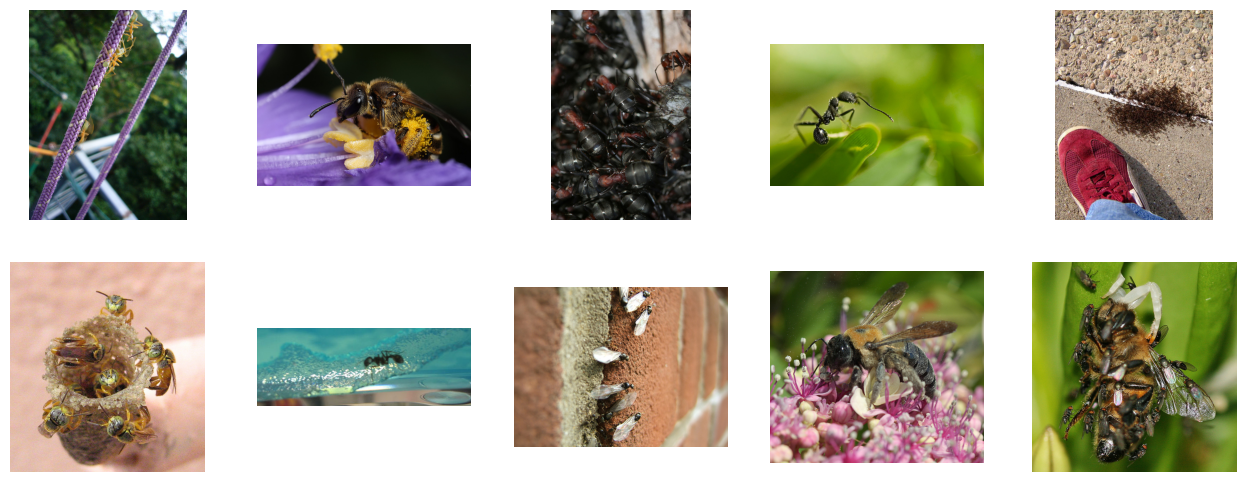

In [5]:
import matplotlib.image as mpimg

# show some images
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    idx = np.random.randint(0,len(image_datasets['train'].samples))
    image = mpimg.imread(image_datasets['train'].samples[idx][0])
    plt.imshow(image)
    plt.axis('off');

Since we have very little training data it makes sense to use some data augmentation for training.

<span style="color:blue">

**Exercise 1**: Change the transforms in the code below in order to add some data augmentation to the training data. See if you can do a random crop instead of always cropping in the middle, and add horizontal flips. Then recreate the datasets and dataloaders.
    
</span>

In [6]:
# CHANGE THE CODE BELOW

# ResNet input size
input_size = (224,224)

# Just normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(.2),
        transforms.RandomVerticalFlip(.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")

# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

print("Done")

Initializing Datasets and Dataloaders...
Done


## Define the training function

The `train_model` function handles the training and validation of a given model. As input, it takes a PyTorch model, a dictionary of dataloaders, a loss function, an optimizer, and a specified number of epochs to train and validate for.

Instead of defining different functions for tranining and validation, we have combined everything into a single one below.

Note that we also have implemented early stopping - we keep track of the performance of our model on the validation set, and we keep a copy of the best model found using Python's `copy.deepcopy()` function. After training finishes, we copy the best weights from the saved model.

In [57]:
def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=25, start_epoch=0, train_batch_idx=0, val_batch_idx=0):
    since = time.time()

    acc_history = {"train": [], "val": []}
    losses = {"train": [], "val": []}

    best_model_wts = copy.deepcopy(model.state_dict())
    current_best_acc_in_call = 0.0

    for epoch in range(start_epoch, start_epoch + num_epochs):
        print('Epoch {}/{}'.format(epoch, start_epoch + num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    if wandb.run:
                        if phase == 'train':
                            train_batch_idx += 1
                            wandb.log({"train_batch_loss": loss.item(),
                                       "train/batch_step": train_batch_idx,
                                       "learning_rate": optimizer_ft.param_groups[0]['lr']})
                            losses['train'].append(loss.item()) # Optional local storage
                        else:
                            val_batch_idx += 1
                            wandb.log({"val_batch_loss": loss.item(),
                                       "val/batch_step": val_batch_idx})
                            losses['val'].append(loss.item()) # Optional local storage

                    _, preds = torch.max(outputs, 1)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data).cpu().numpy()

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects / len(dataloaders[phase].dataset)

            scheduler.step(epoch_loss)

            if wandb.run:
                wandb.log({f"{phase}_loss": epoch_loss,
                           f"{phase}_acc": epoch_acc,
                           "epoch": epoch})
            # ---------------------------------------------

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > current_best_acc_in_call:
                 current_best_acc_in_call = epoch_acc
                 best_model_wts = copy.deepcopy(model.state_dict())

            acc_history[phase].append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete for this call in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc during this call: {:4f}'.format(current_best_acc_in_call))

    # Log the best accuracy achieved *in this specific call*
    # Consider logging against the final epoch number if defined above
    if wandb.run:
        wandb.log({"best_val_acc_in_call": current_best_acc_in_call, "epoch": epoch}) # Optional: log against last epoch
        #wandb.log({"best_val_acc_in_call": current_best_acc_in_call}) # Or log against default step


    # --- Model Saving ---
    best_model_path = f"best_model_epoch_{epoch}.pt"
    torch.save(best_model_wts, best_model_path)
    if wandb.run:
        model_artifact = wandb.Artifact(
            name=f"model-{wandb.run.id}",
            type="model",
            description=f"Best model weights from epochs {start_epoch}-{start_epoch + num_epochs-1}",
            metadata={"best_val_acc": current_best_acc_in_call, "epoch": epoch} # Add metadata
        )
        model_artifact.add_file(best_model_path)
        wandb.log_artifact(model_artifact)

    # load best model weights for return
    model.load_state_dict(best_model_wts)
    return model, acc_history, losses, train_batch_idx, val_batch_idx, start_epoch + num_epochs

## Initialize the ResNet model

We will use the Resnet18 model (the smaller one), as our dataset is small and only has two classes. When we print the model, we see that the last layer is a fully connected layer as shown below:


   `(fc): Linear(in_features=512, out_features=1000, bias=True)`



In [58]:
# This is a function that we will adapt in various ways during the rest of the notebook, right now, it just creates and returns the model and the input size of images
def initialize_model():
    # Resnet18
    model = models.resnet18()

    input_size = 224

    return model, input_size

# Initialize the model
model, input_size = initialize_model()

# Print the model we just instantiated
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<span style="color:blue">

**Exercise 2**: Modify the function `initialize_model` so that it takes the number of classes `num_classes` as an argument, and it reinitializes `model.fc` to be a Linear layer with 512 input features and `num_classes` output features. Then use the function to create a model with 2 output classes.

</span>

In [59]:
def initialize_model(num_classes):
    model = models.resnet18(num_classes=num_classes)
    input_size = 224

    return model, input_size

### Run Training and Validation Step

Let's start by training the model from scratch. What do you think will happen?


In [60]:
model, input_size = initialize_model(2)

In [61]:
# Send the model to GPU
model = model.to(device)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Number of epochs to train for
num_epochs = 15

optimizer_ft = optim.Adam(model.parameters(), lr=0.001)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer_ft, patience=5, verbose=True)

lr = optimizer_ft.param_groups[0]['lr']
betas = optimizer_ft.param_groups[0]['betas']
weight_decay = optimizer_ft.param_groups[0]['weight_decay']

run = wandb.init(
    project="finetuning-notebook",
    config={
        "learning_rate": lr,
        "betas": betas,
        "optimizer": optimizer_ft.__class__.__name__,
        "scheduler": scheduler.__class__.__name__,
        "weight_decay": weight_decay,
        "architecture": model.__class__.__name__,
        "finetuning": "not implemented",
        "dataset": "hymenoptera",
        "epochs": num_epochs,
        "batch_size": batch_size,
    }
)

train_batch_idx = 0
val_batch_idx = 0
final_epoch = 0

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [65]:
model, hist, losses, train_batch_idx, val_batch_idx, final_epoch = train_model(model, dataloaders_dict, criterion, optimizer_ft, scheduler, num_epochs=num_epochs, train_batch_idx=train_batch_idx, val_batch_idx=val_batch_idx, start_epoch=final_epoch)

Epoch 30/44
----------
train Loss: 0.5902 Acc: 0.6844
val Loss: 0.6138 Acc: 0.6732

Epoch 31/44
----------
train Loss: 0.5650 Acc: 0.7213
val Loss: 0.6094 Acc: 0.6667

Epoch 32/44
----------
train Loss: 0.6185 Acc: 0.6475
val Loss: 0.6179 Acc: 0.6471

Epoch 33/44
----------
train Loss: 0.5851 Acc: 0.7131
val Loss: 0.6071 Acc: 0.6928

Epoch 34/44
----------
train Loss: 0.5963 Acc: 0.6926
val Loss: 0.6119 Acc: 0.6732

Epoch 35/44
----------
train Loss: 0.6026 Acc: 0.7049
val Loss: 0.6128 Acc: 0.6732

Epoch 36/44
----------
train Loss: 0.5660 Acc: 0.6967
val Loss: 0.6134 Acc: 0.6732

Epoch 37/44
----------
train Loss: 0.6033 Acc: 0.6639
val Loss: 0.6034 Acc: 0.6601

Epoch 38/44
----------
train Loss: 0.5833 Acc: 0.7008
val Loss: 0.6028 Acc: 0.6732

Epoch 39/44
----------
train Loss: 0.5802 Acc: 0.6762
val Loss: 0.6105 Acc: 0.6732

Epoch 40/44
----------
train Loss: 0.6217 Acc: 0.6598
val Loss: 0.6230 Acc: 0.6732

Epoch 41/44
----------
train Loss: 0.5854 Acc: 0.6885
val Loss: 0.6217 Acc: 

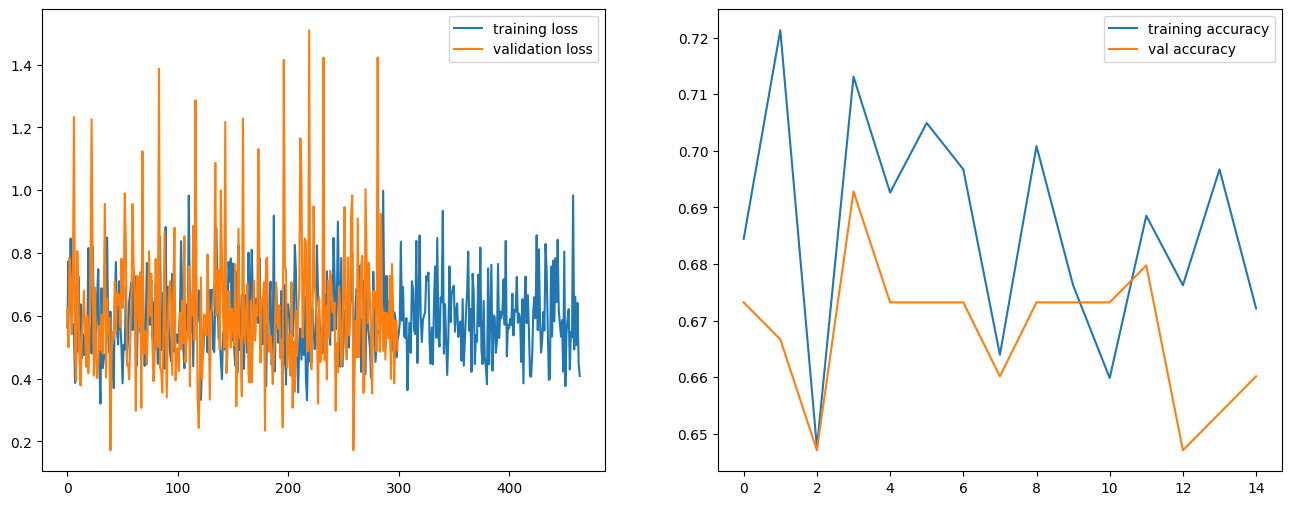

In [66]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses["train"], label="training loss")
ax1.plot(losses["val"], label="validation loss")
ax1.legend()

ax2.plot(hist["train"],label="training accuracy")
ax2.plot(hist["val"],label="val accuracy")
ax2.legend()

plt.show()

In [67]:
wandb.finish()

best_val_acc_in_call,▄▁█
epoch,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████
learning_rate,████████▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/batch_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇████
train_acc,▁▃▅▅▆▄▆▄▄▆▆▇▆▇▇▇▇▇█▇█▇▇▆▇▆▇▇█▆█▇▇▆▇▇▆▇▇▇
train_batch_loss,▅▆▄▂▆█▆▅▆▂▆▆▃▃▂▃▄▃▅▃▄▁▂▃▄▄▂▆▁▄▃▇▅▄▂▃▂▃▂▁
train_loss,█▄▃▃▃▃▂▃▄▂▂▁▁▁▂▁▂▁▂▂▁▂▁▁▁▂▂▁▁▂▁▂▁▂▁▁▂▁▁▂
val/batch_step,▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇█
val_acc,▄▇▁▅▄▅▄▇▅▇▆▆▇▆▇▆▆▆▇▇▅▅▆▆▇▆▆▇▇▆█▇▇▇▇▇▇▇▆▇
val_batch_loss,▇█▅▅█▃▅█▂▆▂▃▁▄▅▃▅▄▄▃▆▃▅▅▅▃▄▄▆▄▃▃▃▄▅▆▄▄▅▄
val_loss,█▂▅▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


Training from scratch with only 100 examples per class does not allow the network to perform very well in this task. It reaches at most 70% accuracy, and the loss seems not to descrease anymore.

## Preparing the model for finetuning and feature extraction

In order to finetune a model or use it for feature extraction, we need to first load the pretrained weights, and then to freeze the part of the model we do not want to change.

In order to load the pretrained weights for the ResNet model we must change a bit more the function `initialize model`. One one hand, we need to load the weights of the pre-trained ResNet model, trained on ImageNet.

Moreover, depending on whether we want to do finetuning (update all parameters of the model) or if we want to do feature extraction (update only the last fully connected layer), we must specify which parameter to update.

The following function sets the `.requires_grad` attribute of all the parameters in the model to False. This way we are freezing the model, since the parameters with `.requires_grad=False` will not be updated during training.


In [68]:
def freeze_model(model):
    for param in model.parameters():
        param.requires_grad = False

<span style="color:blue">

**Exercise 3**: Modify the function `initialize_model` so that it takes an extra argument called `finetuning`. If this function is True, then all parameters of the model should be able to update. If it is false, this would mean that we want to do feature extraction, and all parameters of the model should be frozen except the last fully connected layer.
    
In addition, look up the documentation of [`models.resnet18()`](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html) and initialise the models with the `DEFAULT` weights.

Then create again your model,
    
</span>

In [69]:
def initialize_model(num_classes, finetuning):
    model = models.resnet18(torchvision.models.ResNet18_Weights.DEFAULT)

    input_size = 224

    if finetuning:
        for param in model.parameters():
            param.requires_grad = True
    else:
        freeze_model(model)

    model.fc = nn.Linear(512, num_classes)
    return model


### Create the Optimizer

The final step for finetuning and feature extracting is to create an optimizer that **only** updates the desired parameters. Recall that after loading the pretrained model, if `finetuning == False` (we want to do feature extraction instead) we manually set all of the parameters' `.requires_grad` attributes to False. But the parameters of the reinitialized layer that we add afterwards have `.requires_grad=True` by default. So *all parameters that have `.requires_grad=True` should be optimized*. Next, we make a list of such parameters and input this list to the Adam algorithm constructor.

In [70]:
model = initialize_model(2, finetuning=False)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 204MB/s]


In [72]:
# Gather the parameters to be optimized/updated in this run. If we are finetuning we will be updating all parameters. However, if we are
# doing feature extract method, we will only update the parameters that we have just initialized, i.e. the parameters with requires_grad is True.

params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

<br>
<span style="color:blue">

**Exercise 4**: Train the model with feature extraction for 15 epochs. This is, you must freeze all parameters except the last fully connected layer. Plot the train/val losses and accuracies.
    
Do not overwrite the previous best model, losses and accuracies, keep the new ones in separate variables.
    
</span>

In [73]:
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.Adam(params_to_update, lr=0.001)

# Number of epochs to train for
num_epochs = 15

optimizer_ft = optim.Adam(model.parameters(), lr=0.001)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer_ft, patience=5, verbose=True)

lr = optimizer_ft.param_groups[0]['lr']
betas = optimizer_ft.param_groups[0]['betas']
weight_decay = optimizer_ft.param_groups[0]['weight_decay']

run = wandb.init(
    project="finetuning-notebook",
    config={
        "learning_rate": lr,
        "betas": betas,
        "optimizer": optimizer_ft.__class__.__name__,
        "scheduler": scheduler.__class__.__name__,
        "weight_decay": weight_decay,
        "architecture": model.__class__.__name__,
        "finetuning": False,
        "dataset": "hymenoptera",
        "epochs": num_epochs,
        "batch_size": batch_size,
    }
)

train_batch_idx = 0
val_batch_idx = 0
final_epoch = 0

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [75]:
model, hist, losses, train_batch_idx, val_batch_idx, final_epoch = train_model(model, dataloaders_dict, criterion, optimizer_ft, scheduler, num_epochs=num_epochs, train_batch_idx=train_batch_idx, val_batch_idx=val_batch_idx, start_epoch=final_epoch)

Epoch 15/29
----------
train Loss: 0.3251 Acc: 0.8525
val Loss: 0.2658 Acc: 0.9085

Epoch 16/29
----------
train Loss: 0.2623 Acc: 0.8975
val Loss: 0.1932 Acc: 0.9412

Epoch 17/29
----------
train Loss: 0.2368 Acc: 0.9016
val Loss: 0.1897 Acc: 0.9412

Epoch 18/29
----------
train Loss: 0.2606 Acc: 0.8852
val Loss: 0.1883 Acc: 0.9477

Epoch 19/29
----------
train Loss: 0.2120 Acc: 0.9098
val Loss: 0.1909 Acc: 0.9412

Epoch 20/29
----------
train Loss: 0.2069 Acc: 0.9098
val Loss: 0.1789 Acc: 0.9346

Epoch 21/29
----------
train Loss: 0.2349 Acc: 0.9016
val Loss: 0.1878 Acc: 0.9412

Epoch 22/29
----------
train Loss: 0.2088 Acc: 0.9385
val Loss: 0.1840 Acc: 0.9477

Epoch 23/29
----------
train Loss: 0.2534 Acc: 0.9303
val Loss: 0.1873 Acc: 0.9477

Epoch 24/29
----------
train Loss: 0.2560 Acc: 0.8852
val Loss: 0.1820 Acc: 0.9346

Epoch 25/29
----------
train Loss: 0.2799 Acc: 0.8811
val Loss: 0.1856 Acc: 0.9412

Epoch 26/29
----------
train Loss: 0.2085 Acc: 0.9262
val Loss: 0.1912 Acc: 

In [76]:
wandb.finish()

best_val_acc_in_call,▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇████
learning_rate,███████████████████▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/batch_step,▁▁▁▁▂▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█████
train_acc,▁▇▆▆▇▇▇▆▇▆▆▇▇▆█▆▇▇▇▇▇▇██▇▇█▇▇█
train_batch_loss,▃▃▃▄▁▂▃▄▂▂▅▄▂▃▆█▂▂▃▂▂▂▅▃▃▂▃▂▁▁▁▂▃▂▂▁▃▁▅▄
train_loss,█▄▃▄▃▂▃▂▂▃▃▂▁▃▂▃▂▂▂▁▁▁▁▂▂▂▁▁▂▁
val/batch_step,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇█
val_acc,▁▃▅▁▇▆▇▇▇▆█▆▇▆▇▄▇▇█▇▇▇██▇▇▇█▇█
val_batch_loss,▃▃▁▃▁▂█▂▂▅▁▂▃▂▂▂▂▂▂▁▂▁▂▂▃▁▂▃▁▁▂▁▂▁▂▂▂▁▁▂
val_loss,█▅▄▄▂▂▂▂▂▂▁▂▁▁▁▄▂▁▁▁▁▁▁▁▁▁▁▁▁▂


<br>
<span style="color:blue">

**Exercise 5**: Now train the model finetuning all the parameters for 15 epochs. Plot the train/val losses and accuracies.
    
Do not overwrite the previous best model, losses and accuracies, keep the new ones in separate variables.
    
</span>

In [77]:
model = initialize_model(2, finetuning=True)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [78]:
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.Adam(params_to_update, lr=0.001)

# Number of epochs to train for
num_epochs = 15

optimizer_ft = optim.Adam(model.parameters(), lr=0.001)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer_ft, patience=5, verbose=True)

lr = optimizer_ft.param_groups[0]['lr']
betas = optimizer_ft.param_groups[0]['betas']
weight_decay = optimizer_ft.param_groups[0]['weight_decay']

run = wandb.init(
    project="finetuning-notebook",
    config={
        "learning_rate": lr,
        "betas": betas,
        "optimizer": optimizer_ft.__class__.__name__,
        "scheduler": scheduler.__class__.__name__,
        "weight_decay": weight_decay,
        "architecture": model.__class__.__name__,
        "finetuning": True,
        "dataset": "hymenoptera",
        "epochs": num_epochs,
        "batch_size": batch_size,
    }
)

train_batch_idx = 0
val_batch_idx = 0
final_epoch = 0

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [80]:
model, hist, losses, train_batch_idx, val_batch_idx, final_epoch = train_model(model, dataloaders_dict, criterion, optimizer_ft, scheduler, num_epochs=num_epochs, train_batch_idx=train_batch_idx, val_batch_idx=val_batch_idx, start_epoch=final_epoch)

Epoch 15/29
----------
train Loss: 0.4265 Acc: 0.8279
val Loss: 0.3880 Acc: 0.8301

Epoch 16/29
----------
train Loss: 0.4175 Acc: 0.7910
val Loss: 0.3879 Acc: 0.8170

Epoch 17/29
----------
train Loss: 0.3613 Acc: 0.8279
val Loss: 0.4045 Acc: 0.8301

Epoch 18/29
----------
train Loss: 0.3687 Acc: 0.8689
val Loss: 0.3851 Acc: 0.8105

Epoch 19/29
----------
train Loss: 0.3587 Acc: 0.8770
val Loss: 0.3684 Acc: 0.8235

Epoch 20/29
----------
train Loss: 0.3215 Acc: 0.8811
val Loss: 0.4013 Acc: 0.7908

Epoch 21/29
----------
train Loss: 0.4109 Acc: 0.8074
val Loss: 0.4122 Acc: 0.8235

Epoch 22/29
----------
train Loss: 0.2945 Acc: 0.8730
val Loss: 0.4086 Acc: 0.7974

Epoch 23/29
----------
train Loss: 0.3589 Acc: 0.8320
val Loss: 0.4698 Acc: 0.7647

Epoch 24/29
----------
train Loss: 0.3463 Acc: 0.8402
val Loss: 0.4590 Acc: 0.7908

Epoch 25/29
----------
train Loss: 0.2489 Acc: 0.8975
val Loss: 0.4240 Acc: 0.8235

Epoch 26/29
----------
train Loss: 0.2335 Acc: 0.9057
val Loss: 0.4827 Acc: 

In [81]:
wandb.finish()

best_val_acc_in_call,█▁
epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
learning_rate,█████████████▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/batch_step,▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇███
train_acc,▁▃▃▂▃▃▃▅▄▃▄▅▅▅▆▆▅▆▇▇▇▆▇▆▆██▇█▇
train_batch_loss,█▃▅▂▄▄▄▄▄▆▄▄▃▄▅▃▄▃▄▂▂▃▂▁▁▃▃▅▂▁▂▃▃▁▃▃▂▃▁▁
train_loss,█▅▅▅▄▄▄▃▄▅▄▃▃▃▂▃▃▂▂▂▂▃▂▂▂▁▁▂▁▂
val/batch_step,▁▁▁▁▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇███
val_acc,▁▅▆▆▅▄▄▇▄▅▇▇████████▇█▇▇▇█▇▆▇▇
val_batch_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


<br>
<span style="color:blue">

**Exercise 6**: Plot the  train/val losses and accuracies of all three approaches: training from scratch, finetunning, and festure extraction. To make easier visualization and comparison, use four `plt.subplots`: one for training loss, one for val loss, one for training accuracy, and one for val accuracy.

Make the plot self-explanatory: use legends and titles for each subplot, and a main title for the whole figure.

</span>

### Answer
On the validation accuracy we can clearly see the differences between the 3 different approaches. Feature extraccions seems to be the clear winner.

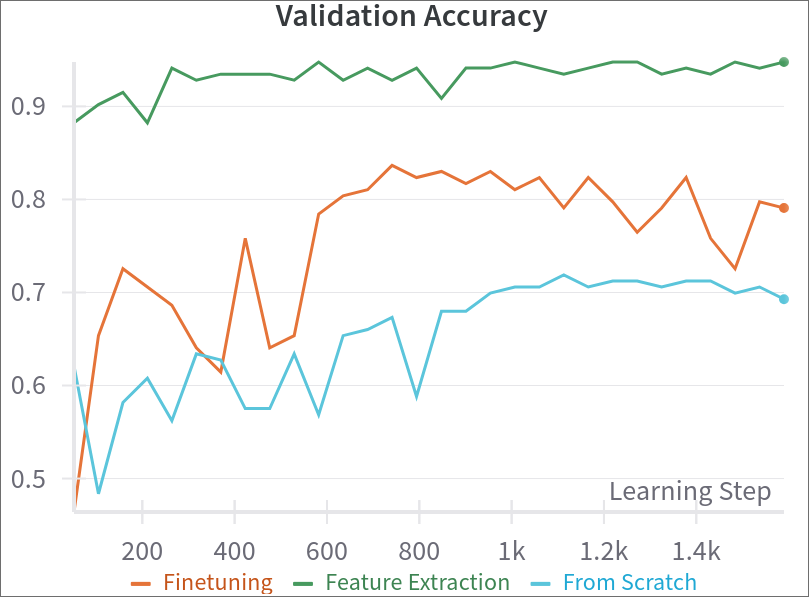

Training Accuracy

We can see how the Finetuning and Feature Extraction model converge on this metrics at the end of the runs:

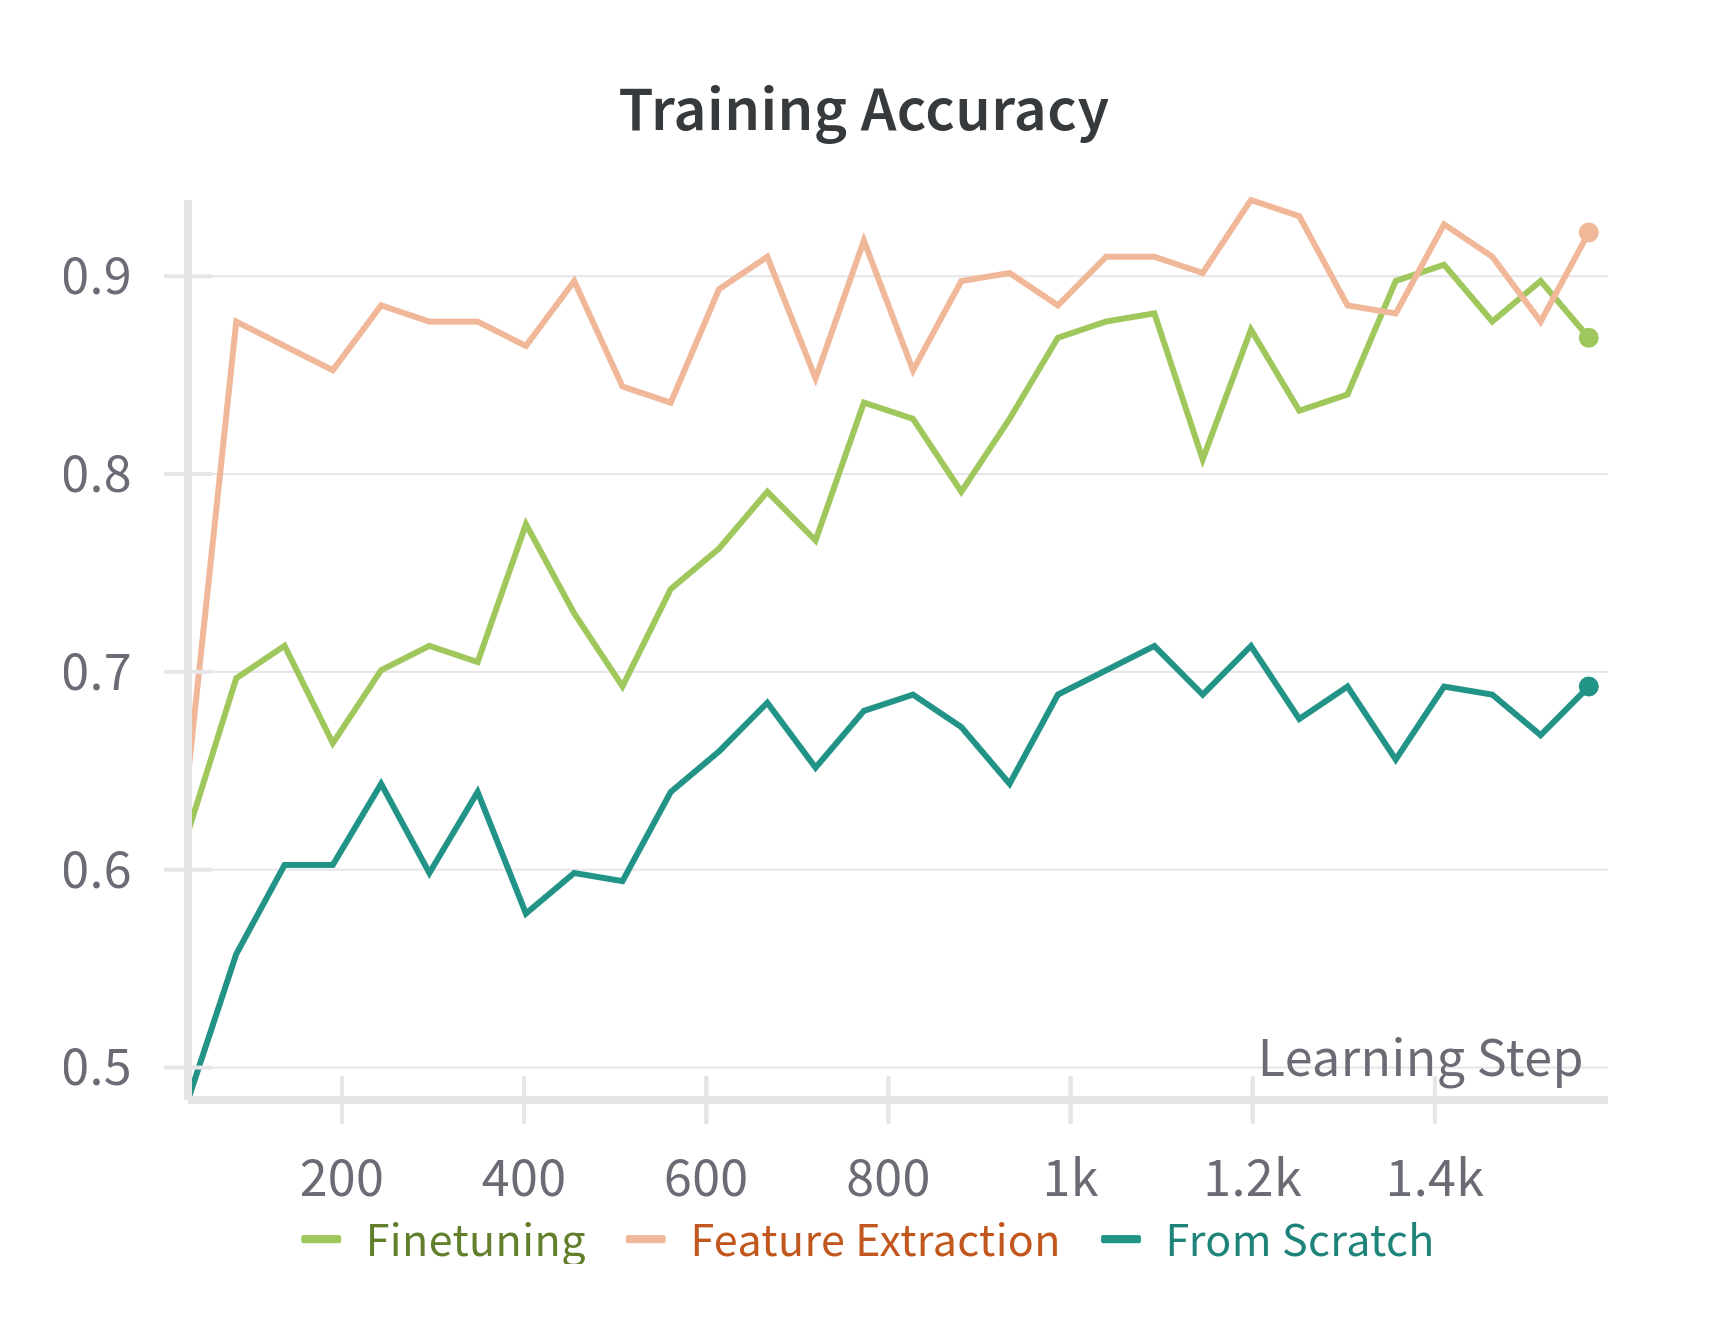

Note that some runs have been trained for more epochs in order to take as much advantage as possible from the scheduler.

Training and validation loss per epoch:

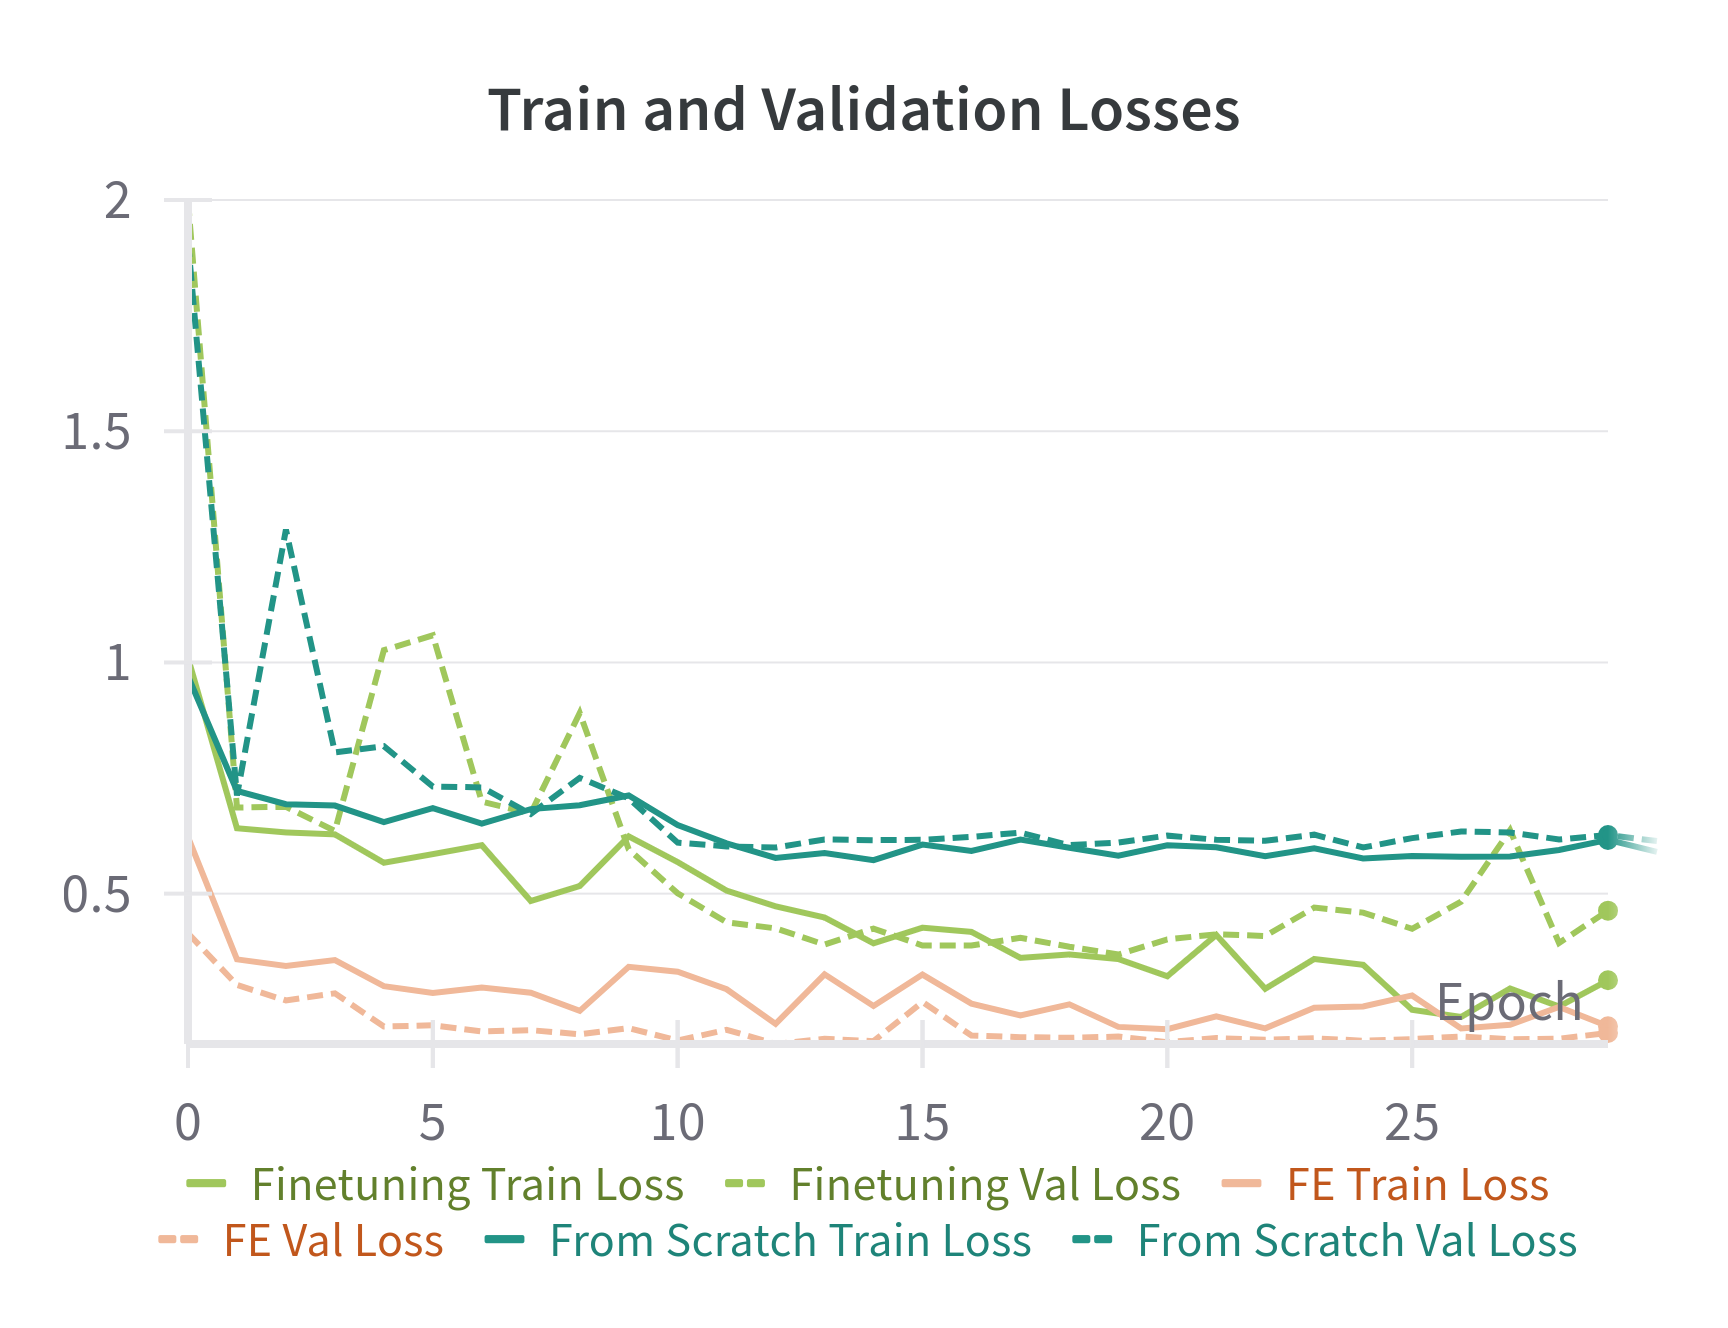

More graphs for more context:

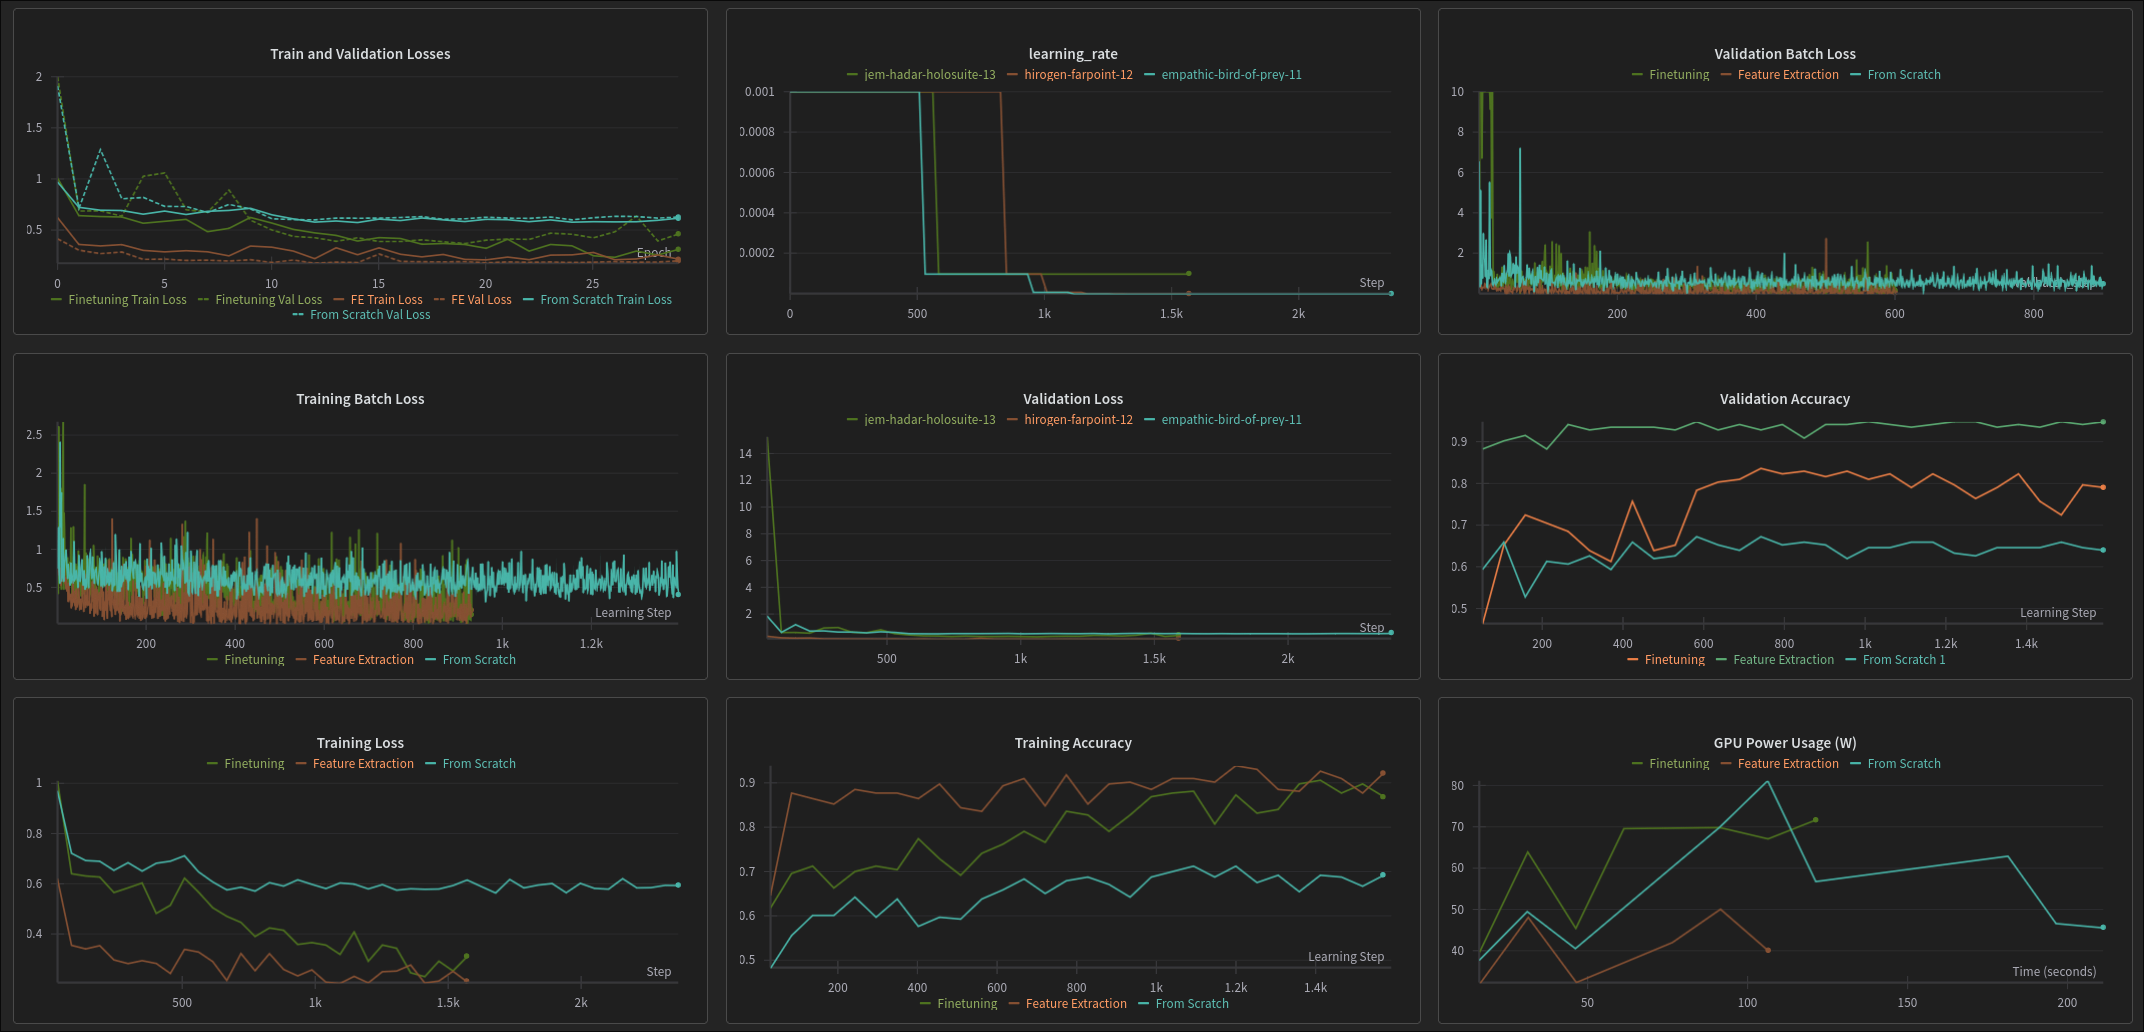

Note that model trained from scratch was trained for more epochs. On the individual graphs shown this was omitted for clarity. The extra compute was given to ensure that we took advandge of the learning rate scheduler.

We can also observed how the Feature Extraction model is the one that takes the least amount of compute (GPU Watts). We expected this, since the trainable parameter number is much smaller.

In [83]:
# GENERATED BY WEIGHTS AND BIASES, I DO NOT LIKE MATPLOTLIB

<br>
<span style="color:blue">

**Exercise 7**: Train the ResNet-18 model for a different dataset (MIT Scenes) using the three training strategies: from scratch (do not load pre-trained weights), finetunning, and feature extraction. Train the model **for 40 epochs** - each training process should take approx. 10 minutes on colab.
    
The URL of the dataset is the following (you also have the file on Campus Virtual):
    
http://pages.cvc.uab.es/dimos/downloads/MIT_scenes.zip

The dataset contains scene images of **8 classes**: coast, forest, highway, inside_city, mountain, open_country, street, and tallbuilding. The number of training images per class varies between 187 and 295.

Train the three models and plot the  train/val losses and accuracies of all of them. Again, to make easier visualization and comparison, use four `plt.subplots`: one for training loss, one for val loss, one for training accuracy, and one for val accuracy.
    
</span>

In [34]:
import numpy as np
import os
import time
import wandb
import copy

In [31]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: tomiock (uab-deeplearning-2025) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [3]:
# dataset and dataloader
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms

url = 'http://pages.cvc.uab.es/dimos/downloads/MIT_scenes.zip'
datasets.utils.download_and_extract_archive(url, './mit_data')

data_dir = './mit_data/MIT_scenes'


100%|██████████| 127M/127M [00:06<00:00, 18.9MB/s]


In [10]:
input_size = (256, 256)

batch_size = 64

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(.2),
        transforms.RandomVerticalFlip(.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}

dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

print("Done")

Done


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


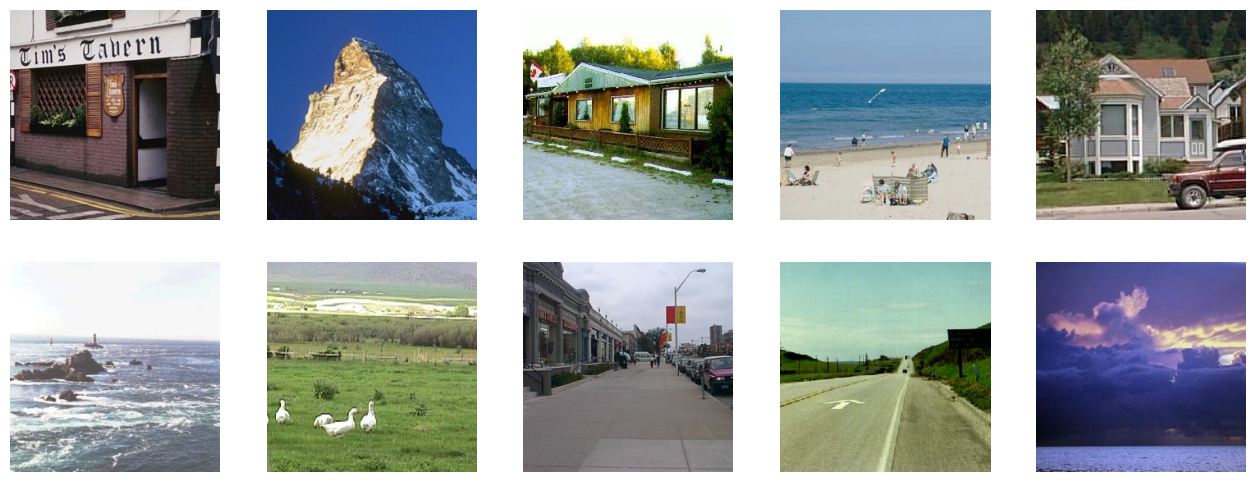

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# show some images
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    idx = np.random.randint(0,len(image_datasets['train'].samples))
    image = mpimg.imread(image_datasets['train'].samples[idx][0])
    plt.imshow(image)
    plt.axis('off');

In [14]:
def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=25, start_epoch=0, train_batch_idx=0, val_batch_idx=0):
    since = time.time()

    acc_history = {"train": [], "val": []}
    losses = {"train": [], "val": []}

    best_model_wts = copy.deepcopy(model.state_dict())
    current_best_acc_in_call = 0.0

    for epoch in range(start_epoch, start_epoch + num_epochs):
        print('Epoch {}/{}'.format(epoch, start_epoch + num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    if wandb.run:
                        if phase == 'train':
                            train_batch_idx += 1
                            wandb.log({"train_batch_loss": loss.item(),
                                       "train/batch_step": train_batch_idx,
                                       "learning_rate": optimizer_ft.param_groups[0]['lr']})
                            losses['train'].append(loss.item()) # Optional local storage
                        else:
                            val_batch_idx += 1
                            wandb.log({"val_batch_loss": loss.item(),
                                       "val/batch_step": val_batch_idx})
                            losses['val'].append(loss.item()) # Optional local storage

                    _, preds = torch.max(outputs, 1)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data).cpu().numpy()

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects / len(dataloaders[phase].dataset)

            scheduler.step(epoch_loss)

            if wandb.run:
                wandb.log({f"{phase}_loss": epoch_loss,
                           f"{phase}_acc": epoch_acc,
                           "epoch": epoch})
            # ---------------------------------------------

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > current_best_acc_in_call:
                 current_best_acc_in_call = epoch_acc
                 best_model_wts = copy.deepcopy(model.state_dict())

            acc_history[phase].append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete for this call in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc during this call: {:4f}'.format(current_best_acc_in_call))

    # Log the best accuracy achieved *in this specific call*
    # Consider logging against the final epoch number if defined above
    if wandb.run:
        wandb.log({"best_val_acc_in_call": current_best_acc_in_call, "epoch": epoch}) # Optional: log against last epoch
        #wandb.log({"best_val_acc_in_call": current_best_acc_in_call}) # Or log against default step


    # --- Model Saving ---
    best_model_path = f"best_model_epoch_{epoch}.pt"
    torch.save(best_model_wts, best_model_path)
    if wandb.run:
        model_artifact = wandb.Artifact(
            name=f"model-{wandb.run.id}",
            type="model",
            description=f"Best model weights from epochs {start_epoch}-{start_epoch + num_epochs-1}",
            metadata={"best_val_acc": current_best_acc_in_call, "epoch": epoch} # Add metadata
        )
        model_artifact.add_file(best_model_path)
        wandb.log_artifact(model_artifact)

    # load best model weights for return
    model.load_state_dict(best_model_wts)
    return model, acc_history, losses, train_batch_idx, val_batch_idx, start_epoch + num_epochs

In [49]:
def freeze_model(model):
    for param in model.parameters():
        param.requires_grad = False

def initialize_model(num_classes, finetuning, weights=None):
    if weights == 'default':
        model = models.resnet18(torchvision.models.ResNet18_Weights.DEFAULT)
    else:
        model = models.resnet18()

    if finetuning:
        for param in model.parameters():
            param.requires_grad = True
    else:
        freeze_model(model)

    model.fc = nn.Linear(512, num_classes, bias=True)
    return model

In [50]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [51]:
model = initialize_model(8, finetuning=True, weights=None)
model = model.to(device)

In [52]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [53]:
params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

In [54]:
criterion = nn.CrossEntropyLoss()

# Number of epochs to train for
num_epochs = 40
batch_size = 64

optimizer_ft = optim.Adam(model.parameters(), lr=0.001)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer_ft, patience=18, verbose=True)

lr = optimizer_ft.param_groups[0]['lr']
betas = optimizer_ft.param_groups[0]['betas']
weight_decay = optimizer_ft.param_groups[0]['weight_decay']

run = wandb.init(
    project="finetuning-notebook",
    name="resnet18-from-scratch-redo",
    config={
        "learning_rate": lr,
        "betas": betas,
        "optimizer": optimizer_ft.__class__.__name__,
        "scheduler": scheduler.__class__.__name__,
        "weight_decay": weight_decay,
        "architecture": model.__class__.__name__,
        "finetuning": True,
        "dataset": "mit_images",
        "epochs": num_epochs,
        "batch_size": batch_size,
        "weights": "random init",
        "num_classes": 8,
    }
)

train_batch_idx = 0
val_batch_idx = 0
final_epoch = 0

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [55]:
model, hist, losses, train_batch_idx, val_batch_idx, final_epoch = train_model(model, dataloaders_dict, criterion, optimizer_ft, scheduler, num_epochs=num_epochs, train_batch_idx=train_batch_idx, val_batch_idx=val_batch_idx, start_epoch=final_epoch)

Epoch 0/39
----------


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


train Loss: 1.7408 Acc: 0.3642
val Loss: 1.5005 Acc: 0.4102

Epoch 1/39
----------
train Loss: 1.2665 Acc: 0.5518
val Loss: 1.3773 Acc: 0.5229

Epoch 2/39
----------
train Loss: 1.1535 Acc: 0.5736
val Loss: 0.8189 Acc: 0.7076

Epoch 3/39
----------
train Loss: 1.0079 Acc: 0.6438
val Loss: 2.6594 Acc: 0.4201

Epoch 4/39
----------
train Loss: 0.9662 Acc: 0.6560
val Loss: 0.8235 Acc: 0.7237

Epoch 5/39
----------
train Loss: 0.9297 Acc: 0.6879
val Loss: 0.8116 Acc: 0.7125

Epoch 6/39
----------
train Loss: 0.8709 Acc: 0.6901
val Loss: 0.6378 Acc: 0.7869

Epoch 7/39
----------
train Loss: 0.7964 Acc: 0.7204
val Loss: 0.5838 Acc: 0.7869

Epoch 8/39
----------
train Loss: 0.7794 Acc: 0.7188
val Loss: 1.0055 Acc: 0.6530

Epoch 9/39
----------
train Loss: 0.8199 Acc: 0.7140
val Loss: 0.7353 Acc: 0.7361

Epoch 10/39
----------
train Loss: 0.8347 Acc: 0.7018
val Loss: 0.5315 Acc: 0.8240

Epoch 11/39
----------
train Loss: 0.7560 Acc: 0.7331
val Loss: 0.5835 Acc: 0.8005

Epoch 12/39
----------
t

In [56]:
wandb.finish()

best_val_acc_in_call,▁
epoch,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇█████
learning_rate,█████████████████████████▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/batch_step,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇█
train_acc,▁▄▄▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
train_batch_loss,█▅▄▄▂▃▃▃▃▃▃▂▃▂▃▂▂▂▂▂▂▂▂▂▂▁▂▁▂▁▂▂▁▂▁▁▁▁▂▁
train_loss,█▆▅▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val/batch_step,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇███████
val_acc,▁▃▅▁▅▅▆▆▄▆▇▆▇▇▇▇▇▇▇▇▇▇▇▆▇▇██████████████
val_batch_loss,▅█▃▃▂▄▂▂▂▂▂▂▃▂▁▂▂▂▂▁▂▂▂▂▂▂▂▂▂▁▁▁▂▂▁▁▁▂▁▁
val_loss,▅▄▃█▃▃▂▂▃▂▂▂▂▂▂▁▂▂▁▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


In [57]:
model = initialize_model(8, finetuning=True, weights='default')
model = model.to(device)

params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [58]:
criterion = nn.CrossEntropyLoss()

# Number of epochs to train for
num_epochs = 40
batch_size = 64

optimizer_ft = optim.Adam(model.parameters(), lr=0.001)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer_ft, patience=18, verbose=True)

lr = optimizer_ft.param_groups[0]['lr']
betas = optimizer_ft.param_groups[0]['betas']
weight_decay = optimizer_ft.param_groups[0]['weight_decay']

run = wandb.init(
    project="finetuning-notebook",
    name="resnet18-finetuning",
    config={
        "learning_rate": lr,
        "betas": betas,
        "optimizer": optimizer_ft.__class__.__name__,
        "scheduler": scheduler.__class__.__name__,
        "weight_decay": weight_decay,
        "architecture": model.__class__.__name__,
        "finetuning": True,
        "dataset": "mit_images",
        "epochs": num_epochs,
        "batch_size": batch_size,
        "weights": "default",
        "num_classes": 8,
    }
)

train_batch_idx = 0
val_batch_idx = 0
final_epoch = 0

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [59]:
model, hist, losses, train_batch_idx, val_batch_idx, final_epoch = train_model(model, dataloaders_dict, criterion, optimizer_ft, scheduler, num_epochs=num_epochs, train_batch_idx=train_batch_idx, val_batch_idx=val_batch_idx, start_epoch=final_epoch)

Epoch 0/39
----------


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


train Loss: 0.8154 Acc: 0.7097
val Loss: 0.8752 Acc: 0.7770

Epoch 1/39
----------
train Loss: 0.6481 Acc: 0.7804
val Loss: 0.4753 Acc: 0.8439

Epoch 2/39
----------
train Loss: 0.5250 Acc: 0.8288
val Loss: 0.7921 Acc: 0.7249

Epoch 3/39
----------
train Loss: 0.5017 Acc: 0.8309
val Loss: 0.3997 Acc: 0.8612

Epoch 4/39
----------
train Loss: 0.4962 Acc: 0.8304
val Loss: 0.5541 Acc: 0.8278

Epoch 5/39
----------
train Loss: 0.4676 Acc: 0.8357
val Loss: 0.4882 Acc: 0.8401

Epoch 6/39
----------
train Loss: 0.4961 Acc: 0.8256
val Loss: 0.2636 Acc: 0.9033

Epoch 7/39
----------
train Loss: 0.3971 Acc: 0.8666
val Loss: 0.5666 Acc: 0.8178

Epoch 8/39
----------
train Loss: 0.3987 Acc: 0.8655
val Loss: 0.7717 Acc: 0.7807

Epoch 9/39
----------
train Loss: 0.3627 Acc: 0.8724
val Loss: 0.3103 Acc: 0.8910

Epoch 10/39
----------
train Loss: 0.3398 Acc: 0.8809
val Loss: 0.3678 Acc: 0.8823

Epoch 11/39
----------
train Loss: 0.3470 Acc: 0.8825
val Loss: 0.4009 Acc: 0.8872

Epoch 12/39
----------
t

In [60]:
wandb.finish()

best_val_acc_in_call,▁
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇████
learning_rate,███████████████████▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/batch_step,▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▇▇▇██████
train_acc,▁▃▄▄▄▅▄▅▅▆▆▆▅▆▆▆▆▇▇▇▇▇▇▇▇▇█▇▇▇██████████
train_batch_loss,█▅█▇▆▃▅▅▄▄▄▃▃▄▅▄▃▃▃▂▂▂▃▃▃▂▂▂▃▃▃▃▃▃▃▂▂▂▂▁
train_loss,█▆▅▅▅▄▅▄▄▃▃▃▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▂▂▂▁▁▁▁▁▁▁▁▁▁
val/batch_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇██
val_acc,▃▅▁▅▄▅▆▄▃▆▆▆▆▇▆▆▆███████████████████████
val_batch_loss,▃█▇▅▅▅▆▇▆▂▇▂▂▄▄▃▂▂▂▁▃▁▂▃▂▂▂▂▂▁▂▂▁▂▂▃▄▃▁▃
val_loss,█▄▇▄▅▄▂▅▇▃▃▄▃▂▃▂▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


In [61]:
model = initialize_model(8, finetuning=False, weights='default')
model = model.to(device)

params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [62]:
criterion = nn.CrossEntropyLoss()

# Number of epochs to train for
num_epochs = 40
batch_size = 64

optimizer_ft = optim.Adam(model.parameters(), lr=0.001)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer_ft, patience=18, verbose=True)

lr = optimizer_ft.param_groups[0]['lr']
betas = optimizer_ft.param_groups[0]['betas']
weight_decay = optimizer_ft.param_groups[0]['weight_decay']

run = wandb.init(
    project="finetuning-notebook",
    name="resnet18-feature-extraction",
    config={
        "learning_rate": lr,
        "betas": betas,
        "optimizer": optimizer_ft.__class__.__name__,
        "scheduler": scheduler.__class__.__name__,
        "weight_decay": weight_decay,
        "architecture": model.__class__.__name__,
        "finetuning": False,
        "dataset": "mit_images",
        "epochs": num_epochs,
        "batch_size": batch_size,
        "weights": "default",
        "num_classes": 8,
    }
)

train_batch_idx = 0
val_batch_idx = 0
final_epoch = 0

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [63]:
model, hist, losses, train_batch_idx, val_batch_idx, final_epoch = train_model(model, dataloaders_dict, criterion, optimizer_ft, scheduler, num_epochs=num_epochs, train_batch_idx=train_batch_idx, val_batch_idx=val_batch_idx, start_epoch=final_epoch)

Epoch 0/39
----------


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


train Loss: 1.7538 Acc: 0.3780
val Loss: 1.2288 Acc: 0.6543

Epoch 1/39
----------
train Loss: 1.0124 Acc: 0.7236
val Loss: 0.7780 Acc: 0.8253

Epoch 2/39
----------
train Loss: 0.7567 Acc: 0.7980
val Loss: 0.5996 Acc: 0.8538

Epoch 3/39
----------
train Loss: 0.6277 Acc: 0.8357
val Loss: 0.5026 Acc: 0.8798

Epoch 4/39
----------
train Loss: 0.5637 Acc: 0.8394
val Loss: 0.4530 Acc: 0.8810

Epoch 5/39
----------
train Loss: 0.5361 Acc: 0.8464
val Loss: 0.4032 Acc: 0.8823

Epoch 6/39
----------
train Loss: 0.5009 Acc: 0.8410
val Loss: 0.3882 Acc: 0.8872

Epoch 7/39
----------
train Loss: 0.4812 Acc: 0.8565
val Loss: 0.3793 Acc: 0.8959

Epoch 8/39
----------
train Loss: 0.4409 Acc: 0.8655
val Loss: 0.3537 Acc: 0.8848

Epoch 9/39
----------
train Loss: 0.4366 Acc: 0.8623
val Loss: 0.3221 Acc: 0.9009

Epoch 10/39
----------
train Loss: 0.4148 Acc: 0.8634
val Loss: 0.3217 Acc: 0.9009

Epoch 11/39
----------
train Loss: 0.4231 Acc: 0.8708
val Loss: 0.3306 Acc: 0.8947

Epoch 12/39
----------
t

In [64]:
wandb.finish()

best_val_acc_in_call,▁
epoch,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇████
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/batch_step,▁▁▁▂▂▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▅▅▅▅▆▇▇▇▇▇▇▇████
train_acc,▁▆▇▇▇▇▇▇█▇▇███▇█████████████████████████
train_batch_loss,█▆▆▆▄▄▃▃▄▃▂▂▃▃▂▂▃▃▁▂▂▃▂▂▂▂▃▃▂▁▂▂▂▂▂▂▁▂▁▂
train_loss,█▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/batch_step,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇███
val_acc,▁▅▆▇▇▇▇▇▇▇▇▇█▇▇▇████▇███▇█▇█████████▇▇▇█
val_batch_loss,██▇▇▃▄▃▃▂▂▂▂▂▃▂▂▂▂▂▂▁▂▂▂▂▁▂▃▂▁▂▂▂▁▂▂▂▂▁▂
val_loss,█▅▄▃▃▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


<br>
<span style="color:blue">

**Exercise 7**: Visualize some of the images along with the classification results of your best model.
    
*Hints: (1) The images that the dataloader gives you are already normalised, you need to "de-normalise" them if you want to see the true colours. (2) The order of dimensions of PyTorch is C, H, W, if you want to plot images you need your arrays ordered as H, W, C.*
    
</span>

In [ ]:
# YOUR CODE HERE!
